# 配置环境

In [1]:
import sys
sys.path.append('../../')

In [2]:
import os
import math
import numpy as np
import copy

from impedance.validation import linKK
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt

from circuits.ecm import ECM
from circuits.vogit_1 import Vogit_3
from IS.IS import IS_0
from utils.file_utils.pickle_utils import pickle_file, load_pickle_file

%matplotlib widget
from utils.visualize_utils.IS_plots.ny import nyquist_multiPlots_1, nyquist_plot_1
from utils.visualize_utils.IS_plots.residuals import real_residual_plot, residuals_plot

# 在Lin-KK的R(RC)(RW)模拟数据上测试

In [26]:
RaRCbaRWb_pkl_fp = './rbp_files/0/R(RC)(RW)_pkl/'

In [27]:
RaRCbaRWb_IS = IS_0()
RaRCbaRWb_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_14_R(RC)(RW)_ecm.pkl')

In [5]:
RaRCbaRWb_vogit_complexFit = Vogit_3(impSpe=RaRCbaRWb_IS,
                                     fit_type='complex', 
                                     u_optimum=0.85, 
                                     add_C=False,
                                     M_max=150)
RaRCbaRWb_vogit_complexFit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.983716567012829
M =  8 U =  0.9810108350140537
M =  9 U =  0.9901916879194643
M =  10 U =  1.0
M =  11 U =  0.9905475010226824
M =  12 U =  0.9892291753246352
M =  13 U =  0.9960750350329977
M =  14 U =  0.9996963891218347
M =  15 U =  0.9798700482915464
M =  16 U =  0.9796450016816661
M =  17 U =  0.9932035818951033
M =  18 U =  0.9997124895618363
M =  19 U =  0.9768269165025151
M =  20 U =  0.9609323441868368
M =  21 U =  0.9906548509013477
M =  22 U =  0.9950754611148422
M =  23 U =  0.9604118911677086
M =  24 U =  0.9382692978956166
M =  25 U =  0.9821184426382049
M =  26 U =  0.9906644216880086
M =  27 U =  0.9401213504419473
M =  28 U =  0.9281548370412115
M =  29 U =  0.9803804888341014
M =  30 U =  0.9856961123577144
M =  31 U =  0.9261147311416202
M =  32 U =  0.9218363424331499
M =  33 U =  0.9817851189675415
M =  34 U =  0.979637808330233
M =  35 U =  0.916310904733245
M =  36 U =  0.

In [26]:
RaRCbaRWb_vogit_complexFit.M, RaRCbaRWb_vogit_complexFit.u

(66, 0.5572270224623626)

In [27]:
RaRCbaRWb_vogit_complexFit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr.tolist(), RaRCbaRWb_vogit_complexFit.z_sim_arr.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'AIA-IS-Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

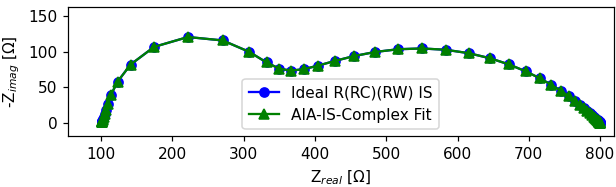

In [28]:
# plot residual
RaRCbaRWb_vogit_complexFit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, residual_arr=RaRCbaRWb_vogit_complexFit.residual_arr, fmt='.-', y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

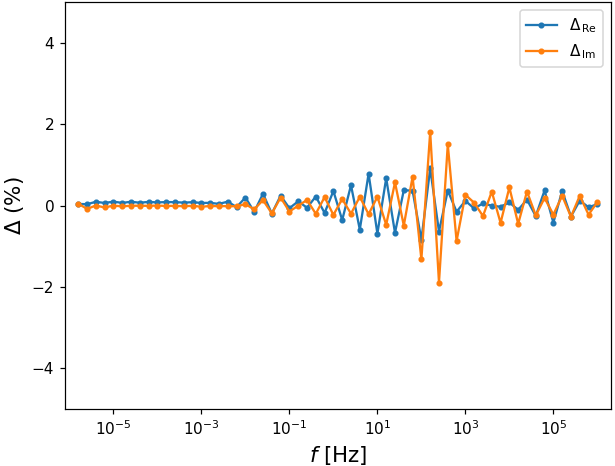

## High-Fre

### Small Disturb

In [3]:
RaRCbaRWb_pkl_fp = './rbp_files/0/R(RC)(RW)_pkl/'

In [18]:
RaRCbaRWb_HF_S_IS = IS_0()
RaRCbaRWb_HF_S_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_HF_S_ecm.pkl')

In [19]:
RaRCbaRWb_HF_S_vogit = Vogit_3(impSpe=RaRCbaRWb_HF_S_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_HF_S_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.983710531202577
M =  8 U =  0.9810042748683347
M =  9 U =  0.9901845887324083
M =  10 U =  1.0
M =  11 U =  0.9905474173595765
M =  12 U =  0.9892276606383467
M =  13 U =  0.9960715684616412
M =  14 U =  0.9996985886749803
M =  15 U =  0.9798820580151185
M =  16 U =  0.9796613188041805
M =  17 U =  0.9932240509353811
M =  18 U =  0.9997095192739028
M =  19 U =  0.9768107857075073
M =  20 U =  0.9609183787702699
M =  21 U =  0.9906423670658218
M =  22 U =  0.9950866696388766
M =  23 U =  0.9604151310645098
M =  24 U =  0.9382605646487888
M =  25 U =  0.9820927512054505
M =  26 U =  0.990722406501893
M =  27 U =  0.9401840781495582
M =  28 U =  0.9282303721943743
M =  29 U =  0.9804783036590038
M =  30 U =  0.9855674605897627
M =  31 U =  0.9260072982821005
M =  32 U =  0.9217455511408098
M =  33 U =  0.9817544163153716
M =  34 U =  0.9796228666916719
M =  35 U =  0.9162277499711823
M =  36 U =  0

In [8]:
RaRCbaRWb_HF_S_vogit.M, RaRCbaRWb_HF_S_vogit.u

(65, 0.8371934486057451)

In [20]:
RaRCbaRWb_HF_S_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_HF_S_IS.z_arr, 
               RaRCbaRWb_HF_S_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-HF-S IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

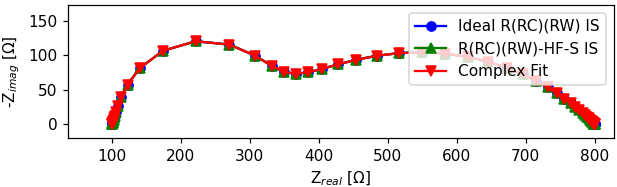

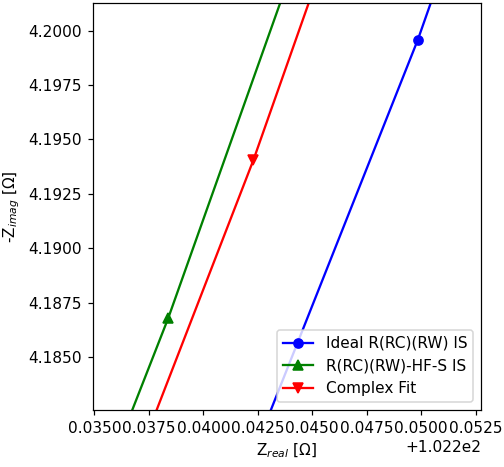

In [21]:
# plot residual
RaRCbaRWb_HF_S_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_HF_S_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

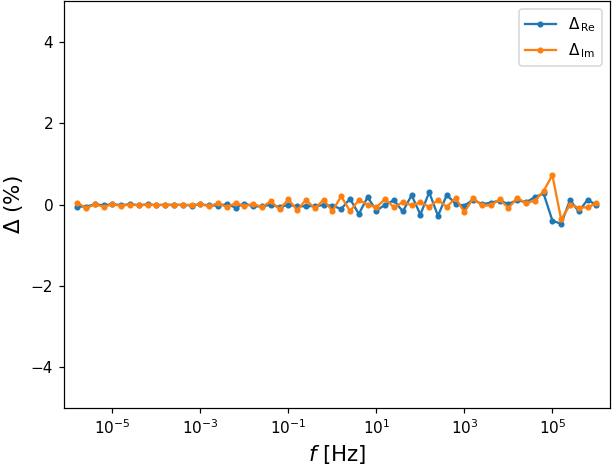

In [22]:
# save vogit
RaRCbaRWb_HF_S_vogit.save2pkl(fp='./rbp_files/2/R(RC)(RW)/pkl/', fn='vogit_R(RC)(RW)_HF_S.pkl')

#### remove disturb

In [8]:
# 删除i=5的点
RaRCbaRWb_IS_no5 = copy.deepcopy(RaRCbaRWb_IS)
RaRCbaRWb_IS_no5.raw_z_arr = np.delete(RaRCbaRWb_IS.raw_z_arr, 5)
RaRCbaRWb_IS_no5.z_arr = np.delete(RaRCbaRWb_IS.z_arr, 5)
RaRCbaRWb_IS_no5.fre_arr = np.delete(RaRCbaRWb_IS.fre_arr, 5)
RaRCbaRWb_IS_no5.w_arr = np.delete(RaRCbaRWb_IS.w_arr, 5)

In [9]:
RaRCbaRWb_vogit_no5 = Vogit_3(impSpe=RaRCbaRWb_IS_no5,
                              fit_type='complex', 
                              u_optimum=0.85, 
                              add_C=False,
                              M_max=150)
RaRCbaRWb_vogit_no5.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9818028379314268
M =  8 U =  0.9786022198647376
M =  9 U =  0.9885688450746465
M =  10 U =  1.0
M =  11 U =  0.9898032416720686
M =  12 U =  0.9883322492158881
M =  13 U =  0.9955597737579559
M =  14 U =  0.9996480594867374
M =  15 U =  0.9790999729014775
M =  16 U =  0.9789296335660834
M =  17 U =  0.9928933042483316
M =  18 U =  0.999630706509486
M =  19 U =  0.9761761422576439
M =  20 U =  0.9603530265421653
M =  21 U =  0.9903598689770889
M =  22 U =  0.9950371136306754
M =  23 U =  0.9599459716004182
M =  24 U =  0.9377902024058636
M =  25 U =  0.9818622756117082
M =  26 U =  0.9903663178200969
M =  27 U =  0.9394409627782991
M =  28 U =  0.927437081952972
M =  29 U =  0.9800226818352333
M =  30 U =  0.9852161617605653
M =  31 U =  0.9251612761339266
M =  32 U =  0.9209239241540547
M =  33 U =  0.9814655194854074
M =  34 U =  0.9791799798218923
M =  35 U =  0.9154901570745401
M =  36 U =  0

In [10]:
RaRCbaRWb_vogit_no5.simulate_Z()
z_pack_list = [RaRCbaRWb_IS_no5.z_arr,
               RaRCbaRWb_vogit_no5.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS no point 5',
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

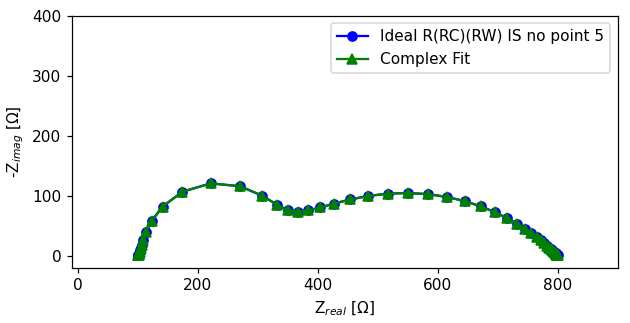

In [13]:
# plot residual
RaRCbaRWb_vogit_no5.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS_no5.fre_arr, 
               residual_arr=RaRCbaRWb_vogit_no5.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

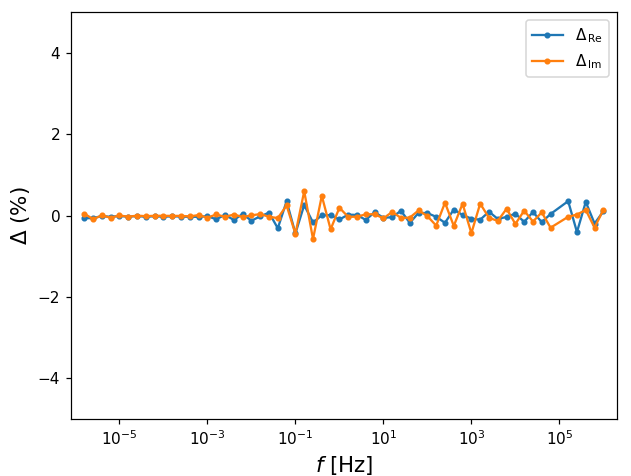

In [11]:
residual_real_abs_arr, residual_imag_abd_arr = RaRCbaRWb_vogit_no5.residual_statistic(type='abs')
residual_real_abs_arr, residual_imag_abd_arr

(array([1.04256036e-03, 1.93385040e-03, 3.37876972e-03, 4.04337034e-03,
        3.56604770e-03, 4.03242027e-04, 1.59471842e-03, 8.89527647e-04,
        1.53356814e-03, 4.92186032e-04, 3.27753967e-04, 8.07060183e-04,
        9.71914881e-04, 1.01054760e-03, 7.29216291e-04, 1.61847923e-04,
        1.49957507e-03, 1.75584939e-03, 2.85351650e-04, 6.19652315e-04,
        7.01255036e-04, 1.78774033e-03, 1.20317553e-03, 3.74473388e-04,
        5.36064489e-04, 8.54515209e-04, 1.05090840e-03, 1.71755001e-04,
        2.45271921e-04, 9.49069839e-04, 1.28562614e-04, 7.63662775e-05,
        1.68319384e-03, 2.60261574e-03, 4.37743027e-03, 3.54604050e-03,
        3.10382171e-03, 7.27979446e-04, 1.71639495e-04, 1.24150051e-03,
        3.95934189e-04, 1.06282026e-03, 2.11804356e-04, 8.89067943e-04,
        1.34404031e-04, 2.91111127e-04, 2.90356940e-04, 2.37370877e-04,
        1.50979024e-04, 2.87747065e-04, 1.21589641e-04, 3.06596802e-04,
        6.42447171e-05, 2.96123717e-04, 4.43836622e-05, 3.055448

In [14]:
residual_real_norm2_arr, residual_imag_norm2_arr = RaRCbaRWb_vogit_no5.residual_statistic(type='norm2')
residual_real_norm2_arr, residual_imag_norm2_arr

(0.01120355394107164, 0.01531506494186815)

### Middle Disturb

In [ ]:
RaRCbaRWb_HF_M_IS = IS_0()
RaRCbaRWb_HF_M_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_HF_M_ecm.pkl')

In [30]:
RaRCbaRWb_HF_M_vogit = Vogit_3(impSpe=RaRCbaRWb_HF_M_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_HF_M_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.983726048606002
M =  8 U =  0.9810068177370678
M =  9 U =  0.9901625715111411
M =  10 U =  1.0
M =  11 U =  0.9906244127672873
M =  12 U =  0.9893259466729846
M =  13 U =  0.9961918420726141
M =  14 U =  0.9994719836955012
M =  15 U =  0.9795873772353271
M =  16 U =  0.9793619628270424
M =  17 U =  0.9929358175657551
M =  18 U =  0.9996714106798658
M =  19 U =  0.9768257753557985
M =  20 U =  0.9608783929974103
M =  21 U =  0.9905084925823834
M =  22 U =  0.9951581054439101
M =  23 U =  0.9608467015669965
M =  24 U =  0.9388238016082874
M =  25 U =  0.9828497190757521
M =  26 U =  0.9898564556661271
M =  27 U =  0.9394533030340722
M =  28 U =  0.9276141678835442
M =  29 U =  0.9800095132067616
M =  30 U =  0.9853617504019394
M =  31 U =  0.9254528445766743
M =  32 U =  0.9204538653602878
M =  33 U =  0.9793777762268285
M =  34 U =  0.9817666483815383
M =  35 U =  0.9205355544916634
M =  36 U =  

In [31]:
RaRCbaRWb_HF_M_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_HF_M_IS.z_arr, 
               RaRCbaRWb_HF_M_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-HF_M IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

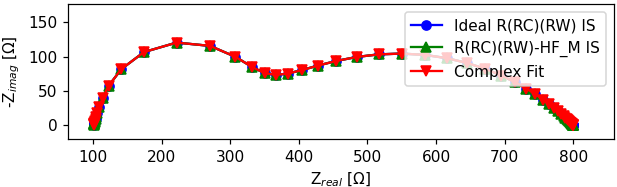

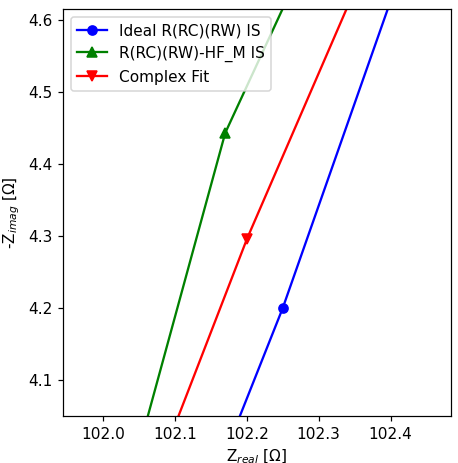

In [33]:
# plot residual
RaRCbaRWb_HF_M_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_HF_M_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

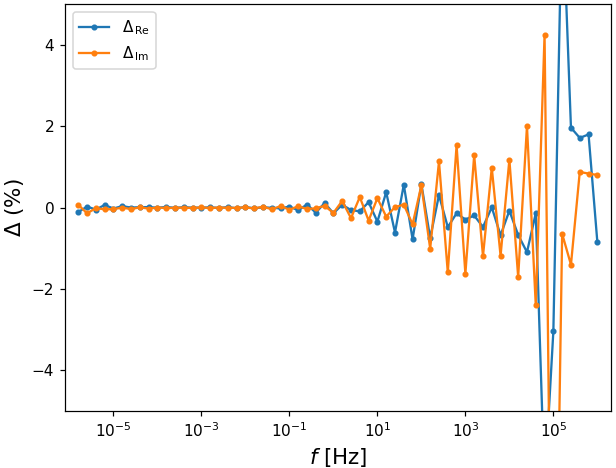

### High Disturb

In [5]:
RaRCbaRWb_HF_H_IS = IS_0()
RaRCbaRWb_HF_H_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_HF_H_ecm.pkl')

In [6]:
RaRCbaRWb_HF_H_vogit = Vogit_3(impSpe=RaRCbaRWb_HF_H_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_HF_H_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9835703463411342
M =  8 U =  0.9807535820075413
M =  9 U =  0.9897435376138997
M =  10 U =  1.0
M =  11 U =  0.9910729546649529
M =  12 U =  0.989840988959735
M =  13 U =  0.9967562859721036
M =  14 U =  0.9982336483223186
M =  15 U =  0.9783501296284329
M =  16 U =  0.9782726353892441
M =  17 U =  0.9920806310659636
M =  18 U =  0.9993265821634832
M =  19 U =  0.976256057991506
M =  20 U =  0.960075539821151
M =  21 U =  0.9892175703198811
M =  22 U =  0.9960336981232568
M =  23 U =  0.9635135427457808
M =  24 U =  0.9417752109036274
M =  25 U =  0.9837833685936826
M =  26 U =  0.9871594727583517
M =  27 U =  0.9377348885999524
M =  28 U =  0.9270832999191484
M =  29 U =  0.9801740674779714
M =  30 U =  0.9797603192161574
M =  31 U =  0.9179053270744625
M =  32 U =  0.9093558952806323
M =  33 U =  0.9625710468541085
M =  34 U =  0.9688424527233996
M =  35 U =  0.9126993268403538
M =  36 U =  0.

In [7]:
RaRCbaRWb_HF_H_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_HF_H_IS.z_arr, 
               RaRCbaRWb_HF_H_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-HF_H IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

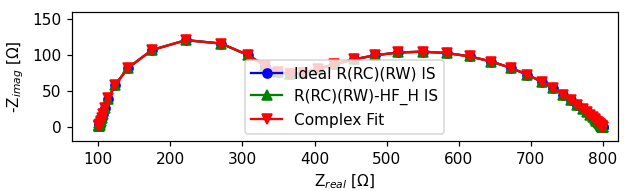

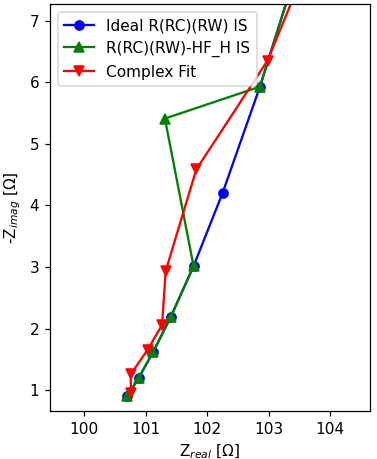

In [8]:
# plot residual
RaRCbaRWb_HF_H_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_HF_H_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

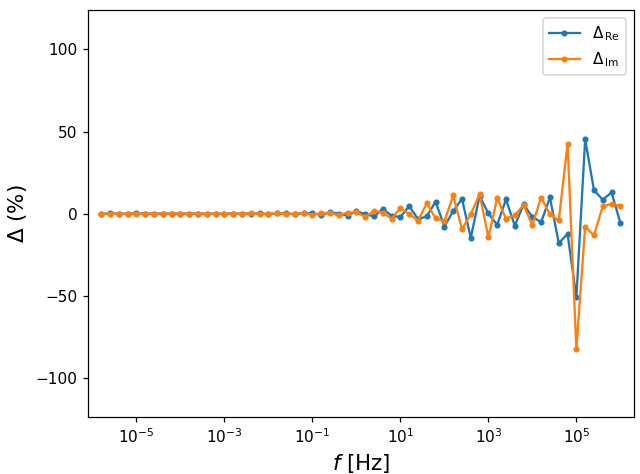

### Big Disturb

对HF-BD 进行 Lin_KK，并保存Lin-KK的拟合结果 用于 论文RBP-Fig4 绘图

In [5]:
RaRCbaRWb_HF_BD_IS = IS_0()
RaRCbaRWb_HF_BD_IS.read_from_EcmCls(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', 
                                    fn='2021_09_15_R(RC)(RW)_HF_H_ecm.pkl')

In [6]:
RaRCbaRWb_HF_BD_vogit = Vogit_3(impSpe=RaRCbaRWb_HF_BD_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False)
RaRCbaRWb_HF_BD_vogit.lin_KK()

In [7]:
RaRCbaRWb_HF_BD_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_HF_BD_IS.z_arr, 
               RaRCbaRWb_HF_BD_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['R(RC)(RW)-HF-BD IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

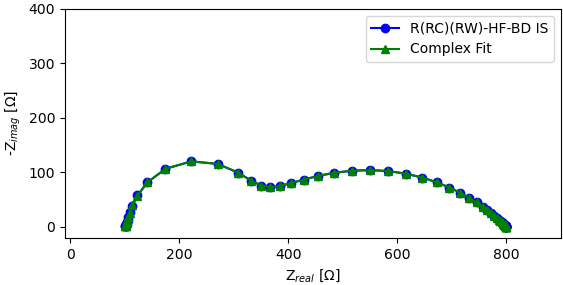

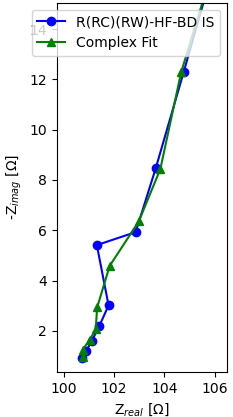

In [8]:
def calPhase(z):
    """
    :param
        z: 3+4j
    :return:
        phase: 45°
    """
    phase = np.arctan2(z.imag, z.real) * 180 / np.pi
    return phase

In [9]:
phaseArr = calPhase(RaRCbaRWb_HF_BD_vogit.z_sim_arr)
print('Fre, Z-Real, -1 * Z-Imag, |Z|, Phi')
# for f, zr, nzi, absZ, phase in zip(ecm.fre_arr, ecm.z_sim_arr.real, ecm.z_sim_arr.imag * (-1), np.abs(ecm.z_sim_arr), phaseArr):
for f, zr, nzi, absZ, phase in zip(RaRCbaRWb_HF_BD_vogit.impSpe.fre_arr, RaRCbaRWb_HF_BD_vogit.z_sim_arr.real,
                                   RaRCbaRWb_HF_BD_vogit.z_sim_arr.imag * (-1), np.abs(RaRCbaRWb_HF_BD_vogit.z_sim_arr), 
                                   phaseArr):    
        print(f, zr, nzi, absZ, phase)

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.7619369767745 0.9488974342296607 100.76640486616641 -0.5395510715921696
630957.344480193 100.75938416715383 1.2592122280146327 100.76725218630938 -0.7160007091256781
398107.1705534969 101.0337931532439 1.6570975488261972 101.04738161485828 -0.9396478209801848
251188.6431509582 101.26786806595108 2.0582013390777423 101.28878168570819 -1.1643378971130407
158489.3192461114 101.32651761064052 2.935094953542823 101.36901870633727 -1.6592057625955177
100000.0 101.82421004340573 4.585515360261726 101.9274089834663 -2.578495666523347
63095.7344480193 102.98079065335075 6.352959320198625 103.17656388789729 -3.5301442609498537
39810.71705534969 103.83856588109559 8.437620938725079 104.18081018761681 -4.645482671297191
25118.864315095823 104.66347718509084 12.274501155427252 105.38077070836319 -6.688859132245903
15848.93192461114 106.43658246219242 18.079055024964696 107.96109631171215 -9.640111495847385
10000.0 109.02953688836068 26.486470426812 1

<T2>对 HF-BD 进行平滑</T2>

In [10]:
from smoothAlg.SavitzkyGolay import savitzkyGolay as SG

In [13]:
HF_BD_SM_Z_arr = SG(RaRCbaRWb_HF_BD_IS.z_arr, loop_time=20, convPoints=5)

In [14]:
HF_BD_SM_phaseArr = calPhase(HF_BD_SM_Z_arr)

In [15]:
print('Fre, Z-Real, -1 * Z-Imag, |Z|, Phi')
for f, zr, nzi, absZ, phase in zip(RaRCbaRWb_HF_BD_IS.fre_arr, HF_BD_SM_Z_arr.real,
                                   HF_BD_SM_Z_arr.imag * (-1), np.abs(HF_BD_SM_Z_arr), 
                                   HF_BD_SM_phaseArr):    
        print(f, zr, nzi, absZ, phase)

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11860270041464 1.6102137079732284 101.13142241790949 -0.9123014973046897
251188.6431509582 101.48989423465198 2.0839647769616723 101.51128775142429 -1.1763300195353616
158489.3192461114 101.45747500320545 3.423987479269139 101.51523493685197 -1.9328847303843493
100000.0 101.79338165563796 4.779454372239437 101.90552356465614 -2.6882061791520915
63095.7344480193 102.53208834646792 6.330881618865812 102.72735372217078 -3.5332634204237667
39810.71705534969 103.72962284711411 8.355959437450949 104.06563656714384 -4.605527594273377
25118.864315095823 104.7396997530948 12.251725229634923 105.4538262723118 -6.6717448486755275
15848.93192461114 106.33311607107122 17.950061941997387 107.83754585999 -9.581749007529847
10000.0 108.89757172144341 26.549203130471454

In [16]:
z_pack_list = [RaRCbaRWb_HF_BD_IS.z_arr, 
               HF_BD_SM_Z_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['R(RC)(RW)-HF-BD IS', 
                                      'Smoothed res'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

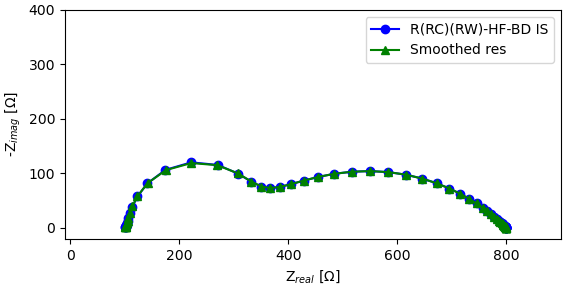

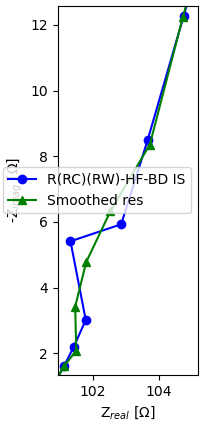

## Middle-Fre

### Small Disturb

In [ ]:
RaRCbaRWb_MF_S_IS = IS_0()
RaRCbaRWb_MF_S_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_MF_S_ecm.pkl')

In [10]:
RaRCbaRWb_MF_S_vogit = Vogit_3(impSpe=RaRCbaRWb_MF_S_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_MF_S_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9837166525555721
M =  8 U =  0.9810110006553728
M =  9 U =  0.9901917655247964
M =  10 U =  1.0
M =  11 U =  0.9905476275707177
M =  12 U =  0.9892290670204484
M =  13 U =  0.9960748914100266
M =  14 U =  0.9996963548235775
M =  15 U =  0.979869374349924
M =  16 U =  0.9796449393141442
M =  17 U =  0.9932043482066687
M =  18 U =  0.9997115316133349
M =  19 U =  0.9768279051227703
M =  20 U =  0.9609058537765479
M =  21 U =  0.9906620830881553
M =  22 U =  0.995078915889807
M =  23 U =  0.9604034067818045
M =  24 U =  0.9383025114675455
M =  25 U =  0.982142674432203
M =  26 U =  0.9906598447169485
M =  27 U =  0.9401731821386086
M =  28 U =  0.9281487247916331
M =  29 U =  0.9803304942241144
M =  30 U =  0.9856892775837998
M =  31 U =  0.9260515222005373
M =  32 U =  0.9217841216509238
M =  33 U =  0.9818217188235849
M =  34 U =  0.9795117844657447
M =  35 U =  0.9163134108290516
M =  36 U =  0.

In [12]:
RaRCbaRWb_MF_S_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_MF_S_IS.z_arr, 
               RaRCbaRWb_MF_S_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-MF_S IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

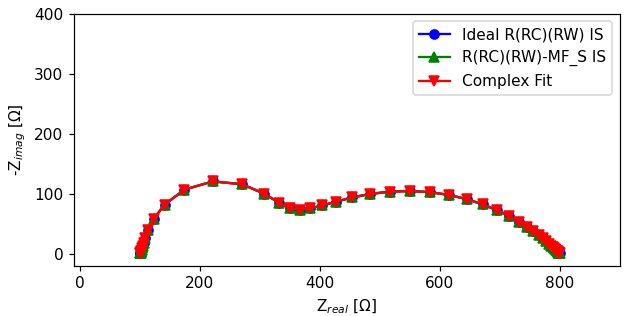

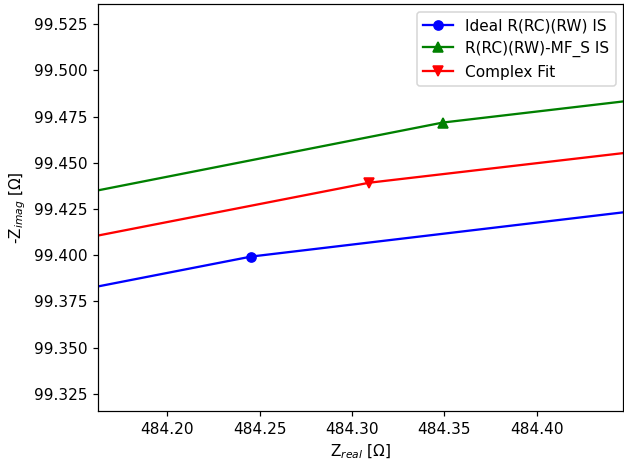

In [14]:
# plot residual
RaRCbaRWb_MF_S_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_MF_S_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

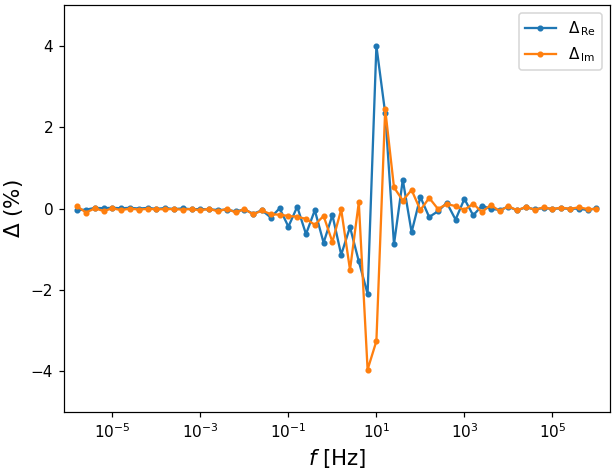

### Middle Disturb

In [15]:
RaRCbaRWb_MF_M_IS = IS_0()
RaRCbaRWb_MF_M_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp,
                                   fn='2021_09_15_R(RC)(RW)_MF_M_ecm.pkl')

In [16]:
RaRCbaRWb_MF_M_vogit = Vogit_3(impSpe=RaRCbaRWb_MF_M_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_MF_M_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9837161413692405
M =  8 U =  0.9810105000382845
M =  9 U =  0.9901921563462182
M =  10 U =  1.0
M =  11 U =  0.9905475116247051
M =  12 U =  0.9892299687054348
M =  13 U =  0.9960754345464438
M =  14 U =  0.9996969248217692
M =  15 U =  0.9798723785887724
M =  16 U =  0.9796439738850748
M =  17 U =  0.9932007847880424
M =  18 U =  0.9997128800172119
M =  19 U =  0.9768208582723882
M =  20 U =  0.9609923826771091
M =  21 U =  0.9905773918267178
M =  22 U =  0.9950634641427161
M =  23 U =  0.9603485579868014
M =  24 U =  0.9381254102712963
M =  25 U =  0.9820997632975048
M =  26 U =  0.9906947981923142
M =  27 U =  0.9399965865107329
M =  28 U =  0.9282857028972584
M =  29 U =  0.980564546913909
M =  30 U =  0.9856830580076879
M =  31 U =  0.9264210242877072
M =  32 U =  0.9219095572888165
M =  33 U =  0.9815166157748614
M =  34 U =  0.9799820517611795
M =  35 U =  0.9160614623804865
M =  36 U =  

In [17]:
RaRCbaRWb_MF_M_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_MF_M_IS.z_arr, 
               RaRCbaRWb_MF_M_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-MF_M IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

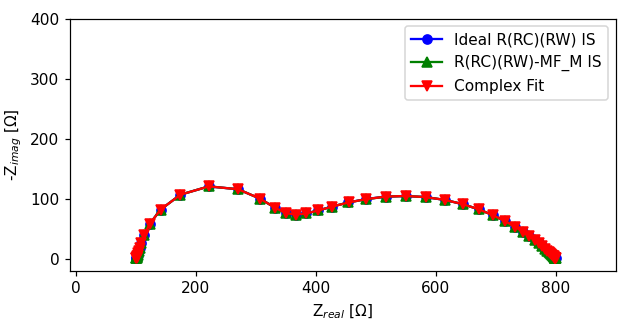

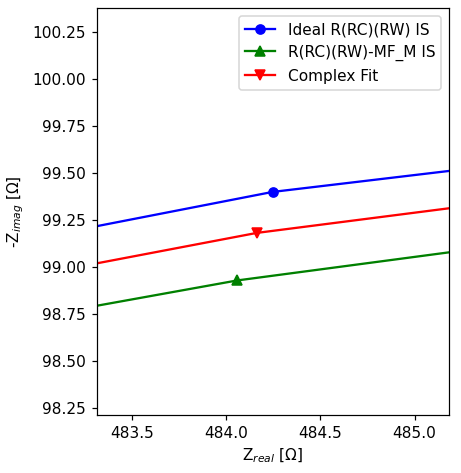

In [19]:
# plot residual
RaRCbaRWb_MF_M_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_MF_M_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

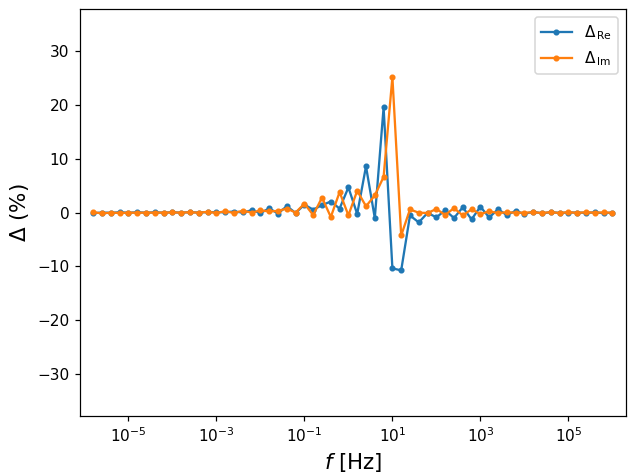

### High Disturb

In [22]:
RaRCbaRWb_MF_H_IS = IS_0()
RaRCbaRWb_MF_H_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_MF_H_ecm.pkl')

In [23]:
RaRCbaRWb_MF_H_vogit = Vogit_3(impSpe=RaRCbaRWb_MF_H_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_MF_H_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9837103625130621
M =  8 U =  0.9810131425377704
M =  9 U =  0.9902111135854718
M =  10 U =  1.0
M =  11 U =  0.9905570809892443
M =  12 U =  0.9892445225336163
M =  13 U =  0.9960762372779134
M =  14 U =  0.9997095910939564
M =  15 U =  0.9798890480583968
M =  16 U =  0.9796102919538738
M =  17 U =  0.9931776697754213
M =  18 U =  0.9996537680516621
M =  19 U =  0.9767216343745436
M =  20 U =  0.9607525669703234
M =  21 U =  0.98891485475082
M =  22 U =  0.994976608188418
M =  23 U =  0.957938017284586
M =  24 U =  0.936483508480949
M =  25 U =  0.9833473824520855
M =  26 U =  0.9912207011445202
M =  27 U =  0.9402574835577577
M =  28 U =  0.93155903734859
M =  29 U =  0.9821201571548412
M =  30 U =  0.9848129513962083
M =  31 U =  0.9304888941219434
M =  32 U =  0.9201608475109505
M =  33 U =  0.9764744089726244
M =  34 U =  0.9799289819928086
M =  35 U =  0.8978543588951904
M =  36 U =  0.9106

In [24]:
RaRCbaRWb_MF_H_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_MF_H_IS.z_arr, 
               RaRCbaRWb_MF_H_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-MF_H IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

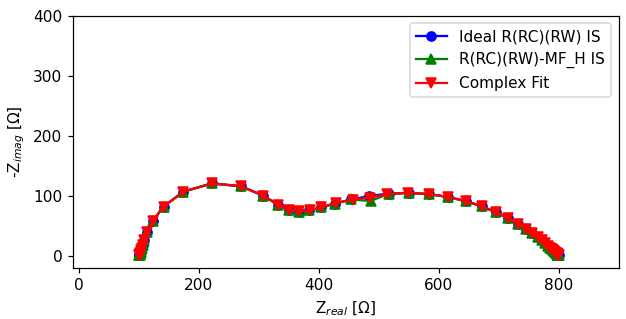

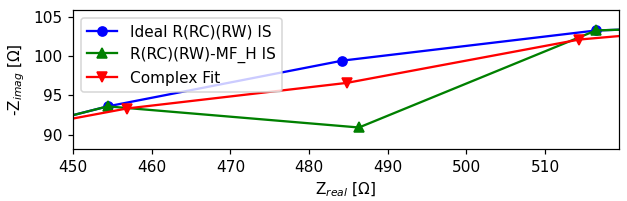

In [25]:
# plot residual
RaRCbaRWb_MF_H_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_MF_H_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

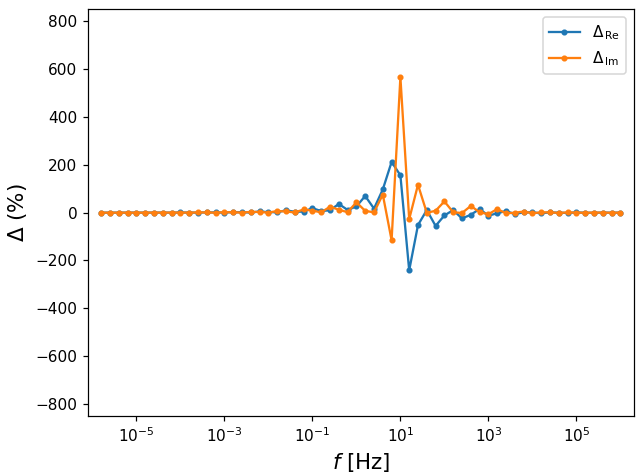

## Low-Fre

### Small Disturb

In [26]:
RaRCbaRWb_LF_S_IS = IS_0()
RaRCbaRWb_LF_S_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_LF_S_ecm.pkl')

In [27]:
RaRCbaRWb_LF_S_vogit = Vogit_3(impSpe=RaRCbaRWb_LF_S_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_LF_S_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9837166680094703
M =  8 U =  0.9810109722933296
M =  9 U =  0.9901917658683159
M =  10 U =  1.0
M =  11 U =  0.9905475714009068
M =  12 U =  0.989229240730574
M =  13 U =  0.9960750505080398
M =  14 U =  0.9996963894639214
M =  15 U =  0.9798699908169552
M =  16 U =  0.9796448556612356
M =  17 U =  0.9932034989266006
M =  18 U =  0.9997124839770275
M =  19 U =  0.9768263992870697
M =  20 U =  0.9609312968468267
M =  21 U =  0.9906545427654034
M =  22 U =  0.9950752811773742
M =  23 U =  0.960410400518889
M =  24 U =  0.9382670007211283
M =  25 U =  0.982117773345778
M =  26 U =  0.9906641177731675
M =  27 U =  0.9401199509695901
M =  28 U =  0.928153893612923
M =  29 U =  0.9803805250189465
M =  30 U =  0.9856963714370843
M =  31 U =  0.9261174259083849
M =  32 U =  0.9218409050646021
M =  33 U =  0.9817159610687552
M =  34 U =  0.9794929984131555
M =  35 U =  0.9161629586768388
M =  36 U =  0.9

In [29]:
RaRCbaRWb_LF_S_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_LF_S_IS.z_arr, 
               RaRCbaRWb_LF_S_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-LF_S IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

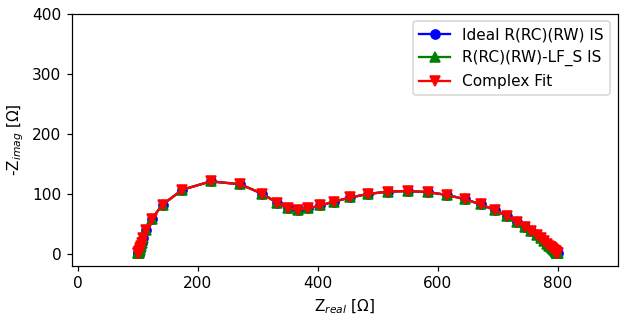

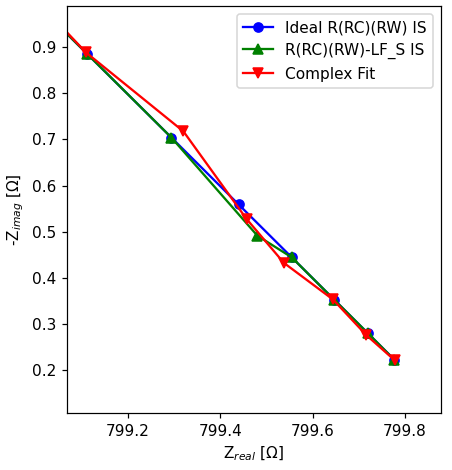

In [31]:
# plot residual
RaRCbaRWb_LF_S_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_LF_S_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

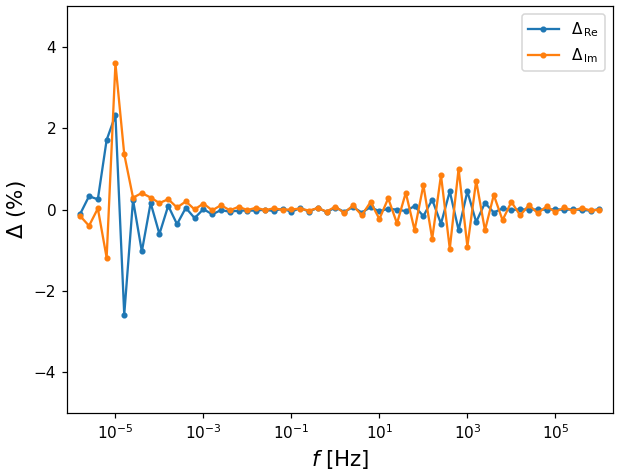

### Middle Disturb

In [36]:
RaRCbaRWb_LF_M_IS = IS_0()
RaRCbaRWb_LF_M_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_LF_M_ecm.pkl')

In [37]:
RaRCbaRWb_LF_M_vogit = Vogit_3(impSpe=RaRCbaRWb_LF_M_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_LF_M_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9837207142043624
M =  8 U =  0.9810165013501607
M =  9 U =  0.9901949363086008
M =  10 U =  1.0
M =  11 U =  0.9905505629888003
M =  12 U =  0.9892321684218862
M =  13 U =  0.9960758316774943
M =  14 U =  0.9996964196863488
M =  15 U =  0.9798690651359032
M =  16 U =  0.9792567988912028
M =  17 U =  0.992428663264448
M =  18 U =  0.9984224799727699
M =  19 U =  0.9750864528604933
M =  20 U =  0.9589053230445628
M =  21 U =  0.988101287889625
M =  22 U =  0.9922355944191246
M =  23 U =  0.957620413780199
M =  24 U =  0.9355582392248644
M =  25 U =  0.9795181867177616
M =  26 U =  0.9885551647687544
M =  27 U =  0.9377744021317352
M =  28 U =  0.9242240619839938
M =  29 U =  0.97311801070701
M =  30 U =  0.9746518715620182
M =  31 U =  0.9121751337991542
M =  32 U =  0.9041786499552205
M =  33 U =  0.9567307589439763
M =  34 U =  0.95080688064457
M =  35 U =  0.8892150473586746
M =  36 U =  0.8902

In [40]:
RaRCbaRWb_LF_M_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_LF_M_IS.z_arr, 
               RaRCbaRWb_LF_M_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-LF_M IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

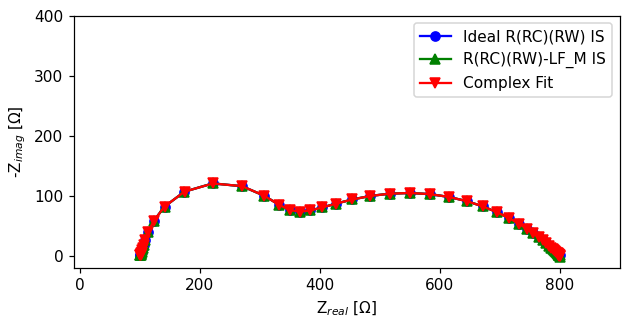

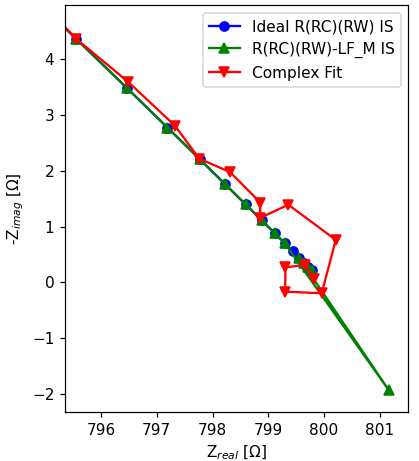

In [42]:
# plot residual
RaRCbaRWb_LF_M_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_LF_M_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

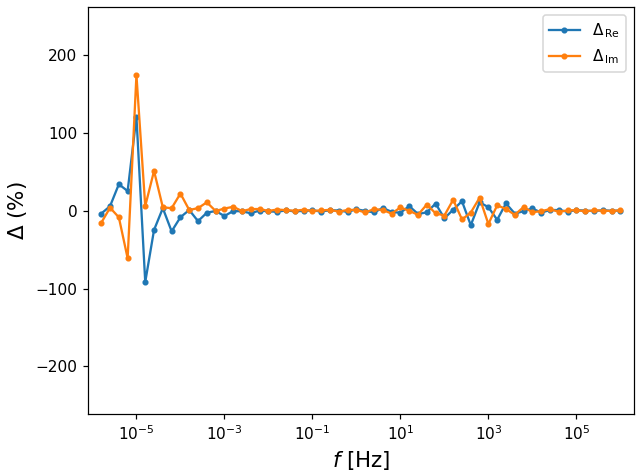

### High Disturb

In [43]:
RaRCbaRWb_LF_H_IS = IS_0()
RaRCbaRWb_LF_H_IS.read_from_EcmCls(fp=RaRCbaRWb_pkl_fp, fn='2021_09_15_R(RC)(RW)_LF_H_ecm.pkl')

In [44]:
RaRCbaRWb_LF_H_vogit = Vogit_3(impSpe=RaRCbaRWb_LF_H_IS, 
                               fit_type='complex', 
                               u_optimum=0.85, 
                               add_C=False,
                               M_max=150)
RaRCbaRWb_LF_H_vogit.lin_KK()

M =  2 U =  1
M =  3 U =  1.0
M =  4 U =  1.0
M =  5 U =  1.0
M =  6 U =  1.0
M =  7 U =  0.9837230438689942
M =  8 U =  0.9810189687639648
M =  9 U =  0.9901955962090967
M =  10 U =  1.0
M =  11 U =  0.9905480648395034
M =  12 U =  0.9892263065279328
M =  13 U =  0.9951265481251628
M =  14 U =  0.9974997632292519
M =  15 U =  0.9765918675400002
M =  16 U =  0.9750545979439981
M =  17 U =  0.9874439020545047
M =  18 U =  0.9928129970332581
M =  19 U =  0.9692806162336768
M =  20 U =  0.9530989768873862
M =  21 U =  0.9822452916996838
M =  22 U =  0.9869950521815647
M =  23 U =  0.9537416076562105
M =  24 U =  0.9316285921178362
M =  25 U =  0.9715709879715146
M =  26 U =  0.9749581781588569
M =  27 U =  0.9183706363059153
M =  28 U =  0.8968822424559212
M =  29 U =  0.9341657272567612
M =  30 U =  0.9270417531729411
M =  31 U =  0.8645379310050401
M =  32 U =  0.8533100831002945
M =  33 U =  0.8974564531789191
M =  34 U =  0.8942050977787697
M =  34 U =  0.8465513191401695


In [45]:
RaRCbaRWb_LF_H_vogit.simulate_Z()
z_pack_list = [RaRCbaRWb_IS.z_arr,
               RaRCbaRWb_LF_H_IS.z_arr, 
               RaRCbaRWb_LF_H_vogit.z_sim_arr]
nyquist_multiPlots_1(z_pack_list=z_pack_list, 
                     x_lim=[-10, 900], y_lim=[-20, 400], 
                     plot_label_list=['Ideal R(RC)(RW) IS',
                                      'R(RC)(RW)-LF_H IS', 
                                      'Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

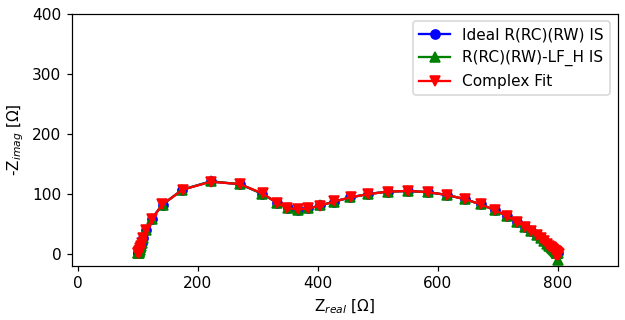

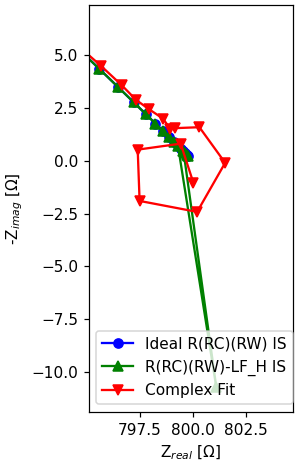

In [46]:
# plot residual
RaRCbaRWb_LF_H_vogit.cal_residual()
%matplotlib widget
residuals_plot(f=RaRCbaRWb_IS.fre_arr, 
               residual_arr=RaRCbaRWb_LF_H_vogit.residual_arr, 
               fmt='.-', 
               y_limits=[-5, 5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

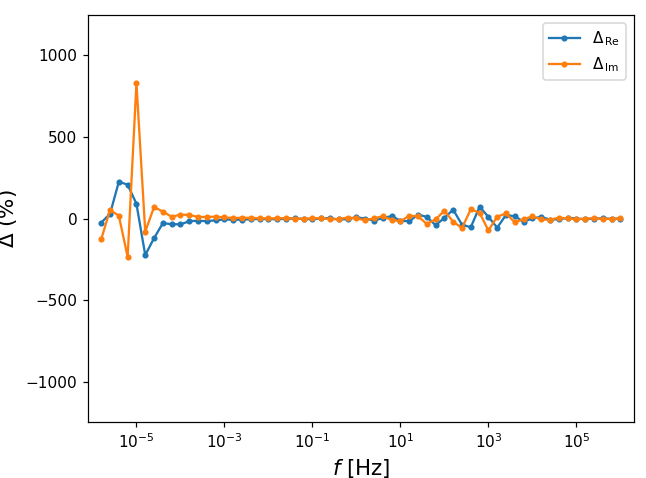

# 在Lin-KK+M软件附带的四条IS上测试我的code

In [3]:
lib_res_fp = './rbp_files/2/example_data_sets/LIB_res'

## ex-1

### Add Capacity

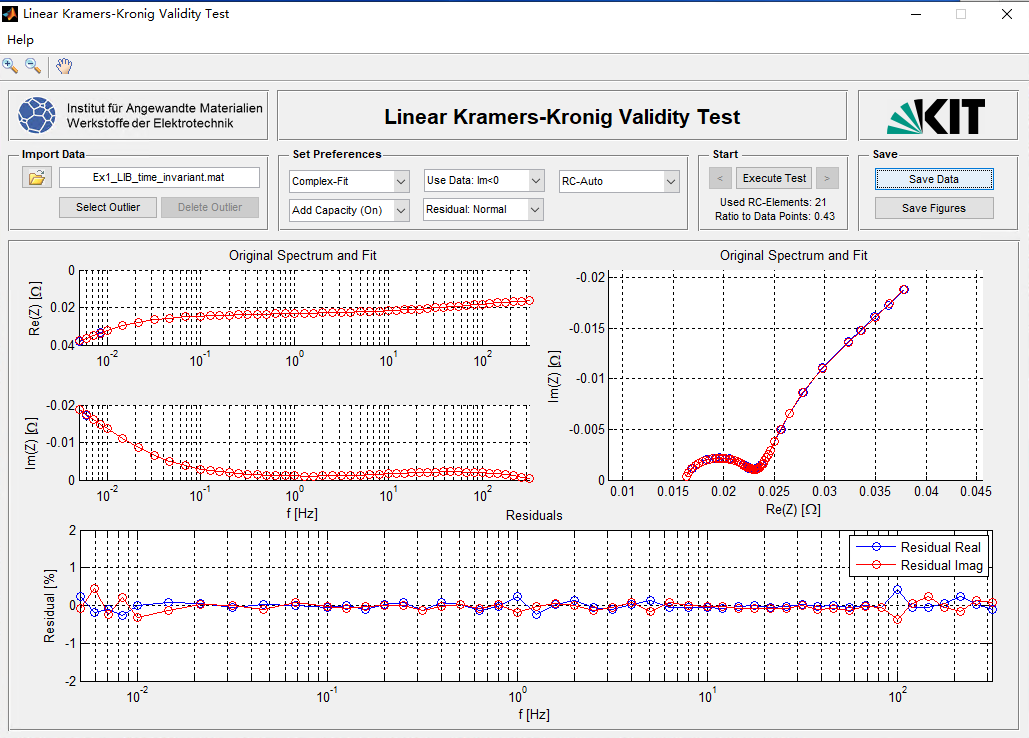

In [5]:
# load data
ex1_data_dict = np.load(os.path.join(lib_res_fp, 'Ex1_LIB_time_invariant_res.npz'))
ex1_z_arr = ex1_data_dict['z_arr']
print('ex1_z_arr', ex1_z_arr.shape)

ex1_f_arr = ex1_data_dict['fre']
print('ex1_f_arr', ex1_f_arr.shape)

ex1_z_MS_sim_arr = ex1_data_dict['z_sim']
print('ex1_z_MS_sim_arr', ex1_z_MS_sim_arr.shape)

ex1_real_residual_arr = ex1_data_dict['real_residual']
print('ex1_real_residual_arr', ex1_real_residual_arr.shape)

ex1_imag_residual_arr = ex1_data_dict['imag_residual']
print('ex1_imag_residual_arr', ex1_imag_residual_arr.shape)

ex1_z_arr (49,)
ex1_f_arr (49,)
ex1_z_MS_sim_arr (49,)
ex1_real_residual_arr (49,)
ex1_imag_residual_arr (49,)


In [6]:
ex1_IS = IS_0()
ex1_IS.raw_z_arr = ex1_z_arr
ex1_IS.exp_area = 1.0
ex1_IS.z_arr = ex1_z_arr
ex1_IS.fre_arr = ex1_f_arr
ex1_IS.w_arr = ex1_IS.fre_arr * 2 * math.pi

In [7]:
# 因为 Ex1_LIB_time_invariant_res.npz 在低频处的数据没有与实轴的交点，所以要在Vogit中添加一个C，add_C=True
ex1_vogit_addC = Vogit_3(impSpe=ex1_IS, fit_type='complex', u_optimum=0.85, add_C=True)
ex1_vogit_addC.lin_KK()

M =  2
M =  3
M =  4
M =  5
M =  6
M =  7
M =  8
M =  9
M =  10
M =  11
M =  12
M =  13
M =  14
M =  15
M =  16
M =  17
M =  18
M =  19
M =  20


In [36]:
# compare nyquist plots of MS-Lin-KK and Mine
ex1_z_MS_sim_list = ex1_z_MS_sim_arr.tolist()
ex1_vogit_addC.simulate_Z()
z_pack_list = [ex1_z_arr.tolist(), ex1_z_MS_sim_list, ex1_vogit_addC.z_sim_arr.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[0.015, 0.045], y_lim=[0, 0.02], plot_label_list=['Ideal IS', 'MS-Fit','Mine-Fit+Add C'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

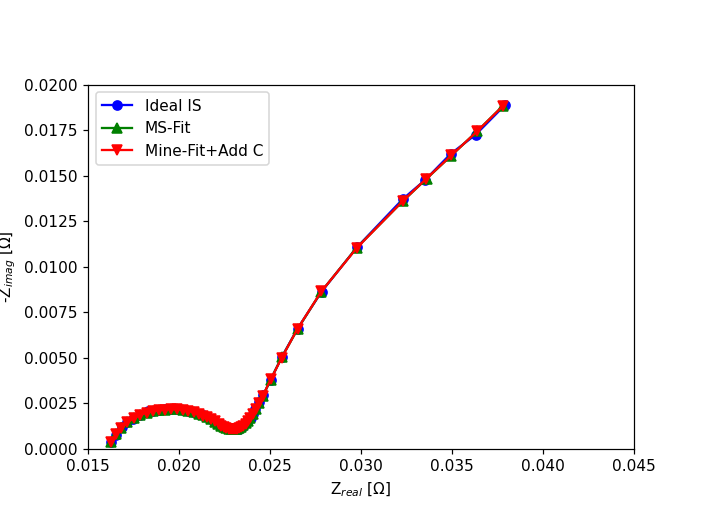

#### 分析实部和虚部的残差

In [20]:
import matplotlib.pyplot as plt
def residuals_plot(f, residual_arr, fmt='.-', y_limits=(-5, 5), title=None):
# def residuals_plot(f, res_real_arr, res_imag_arr, fmt='.-', y_limits=(-5, 5), title=None):
    """
    refer: Impedance-->visualization.py-->plot_residuals(ax, f, res_real, res_imag, fmt='.-', y_limits=(-5, 5), **kwargs):
    :return:
    """
    plt.plot(f, residual_arr.real * 100, fmt, label=r'$\Delta_{\,\mathrm{Re}}$')
    plt.plot(f, residual_arr.imag * 100, fmt, label=r'$\Delta_{\,\mathrm{Im}}$')
    
    if title is not None:
        plt.title(title)

    # Make x axis log scale
    plt.xscale('log')

    # Set the labels to delta vs f
    plt.xlabel('$f$ [Hz]', fontsize=14)
    plt.ylabel('$\\Delta$ $(\\%)$', fontsize=14)

    plt.legend()
    plt.xlim(min(f)/2, max(f)*2)
#     plt.xlim(min(f), max(f))
#     plt.xlim(min(f) / 10, max(f) * 10)
    plt.ylim(y_limits)
    plt.show()

In [31]:
# 计算 每个阻抗上的实部和虚部的残差 的绝对值 之和
def cal_residualAbsSum(residual_arr):
    """
    Calculate
        i = 0 ~ N-1
        the sum(abs(residual_arr.real))
        the sum(abs(residual_arr.imag))
    """
    return sum(np.abs(residual_arr.real)), sum(np.abs(residual_arr.imag))

In [21]:
# 画实部和虚部的残差图
MS_residual_arr = (ex1_z_arr - ex1_z_MS_sim_arr) / np.abs(ex1_z_arr)
ex1_vogit_addC_residual_arr = (ex1_z_arr - ex1_vogit_addC.z_sim_arr) / np.abs(ex1_z_arr)

In [28]:
%matplotlib widget
residuals_plot(f=ex1_f_arr, residual_arr=MS_residual_arr, fmt='.-', y_limits=(-2, 2),
               title='Ex1-Residual MS-Lin-KK-Add C')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

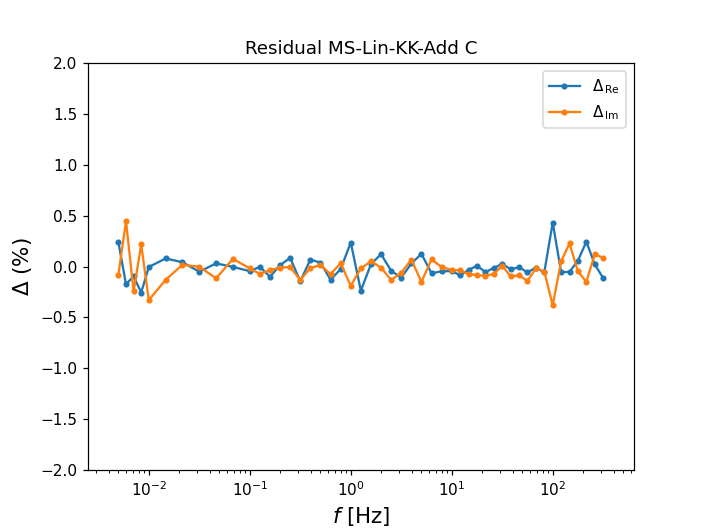

In [33]:
MS_res_real_abs_sum, MS_res_imag_abs_sum = cal_residualAbsSum(residual_arr=MS_residual_arr)
print('MS:',MS_res_real_abs_sum, MS_res_imag_abs_sum)

MS: 0.04064291822611539 0.04661906770650379


In [29]:
%matplotlib widget
residuals_plot(f=ex1_f_arr, residual_arr=ex1_vogit_addC_residual_arr, fmt='.-', y_limits=(-2, 2),
               title='Ex1-Residual ZZY-Lin-KK-Add C')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

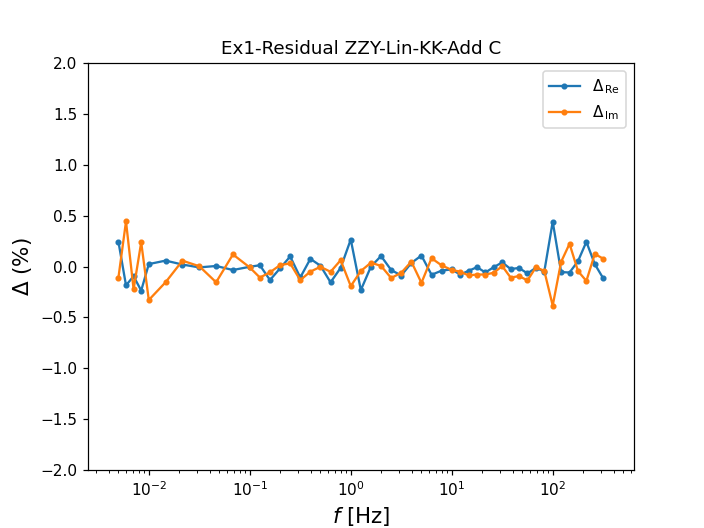

In [34]:
ZZY_res_real_abs_sum, ZZY_res_imag_abs_sum = cal_residualAbsSum(residual_arr=ex1_vogit_addC_residual_arr)
print('ZZY:', ZZY_res_real_abs_sum, ZZY_res_imag_abs_sum)
# MS: 0.04064291822611539 0.04661906770650379

ZZY: 0.039309142669922775 0.04923989119436957


### No Add Capacity

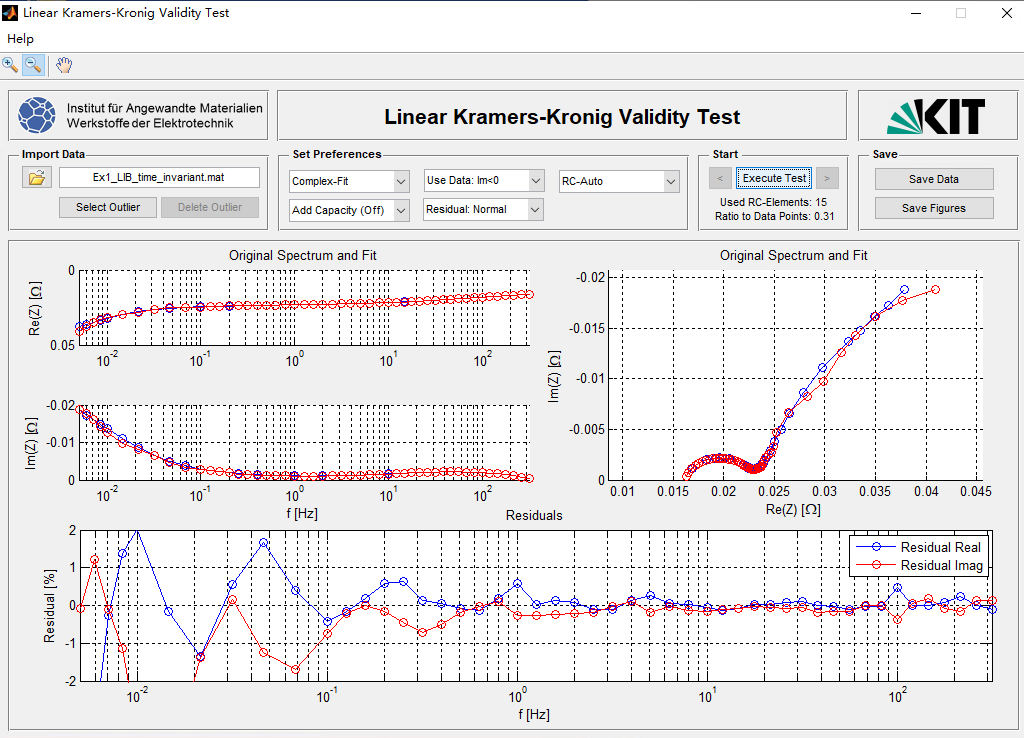

In [35]:
# load data
ex1_data_noC_dict = np.load(os.path.join(lib_res_fp, 'Ex1_LIB_time_invariant_noC_res.npz'))
ex1_z_noC_arr = ex1_data_noC_dict['z_arr'] 
ex1_f_noC_arr = ex1_data_noC_dict['fre']
ex1_z_MS_sim_noC_arr = ex1_data_noC_dict['z_sim']
ex1_real_residual_noC_arr = ex1_data_noC_dict['real_residual']
ex1_imag_residual_noC_arr = ex1_data_noC_dict['imag_residual']

In [37]:
ex1_vogit_noC = Vogit_3(impSpe=ex1_IS, fit_type='complex', u_optimum=0.85, add_C=False)
ex1_vogit_noC.lin_KK()

M =  2
M =  3
M =  4
M =  5
M =  6
M =  7
M =  8
M =  9


In [39]:
# compare nyquist plots of MS-Lin-KK and Mine
ex1_z_MS_sim_noC_list = ex1_z_MS_sim_noC_arr.tolist()
ex1_vogit_noC.simulate_Z()
z_pack_list = [ex1_z_arr.tolist(), ex1_z_MS_sim_noC_list, ex1_vogit_noC.z_sim_arr.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[0.015, 0.045], y_lim=[0, 0.02], plot_label_list=['Ideal IS', 'MS-Fit','Mine-Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

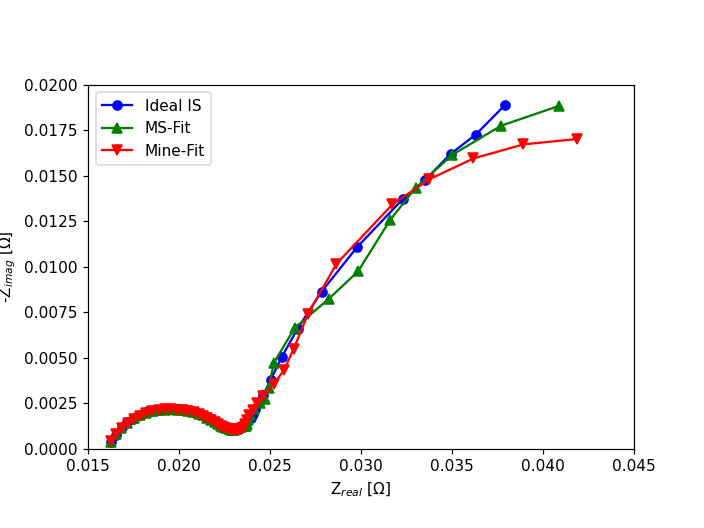

#### 分析实部和虚部的残差

In [40]:
# 画实部和虚部的残差图
MS_noC_residual_arr = (ex1_z_arr - ex1_z_MS_sim_noC_arr) / np.abs(ex1_z_arr)
ex1_vogit_noC_residual_arr = (ex1_z_arr - ex1_vogit_noC.z_sim_arr) / np.abs(ex1_z_arr)

In [46]:
%matplotlib widget
residuals_plot(f=ex1_f_arr, residual_arr=MS_noC_residual_arr, fmt='.-', y_limits=(-8, 8),
               title='Ex1-Residual MS-Lin-KK-No C')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

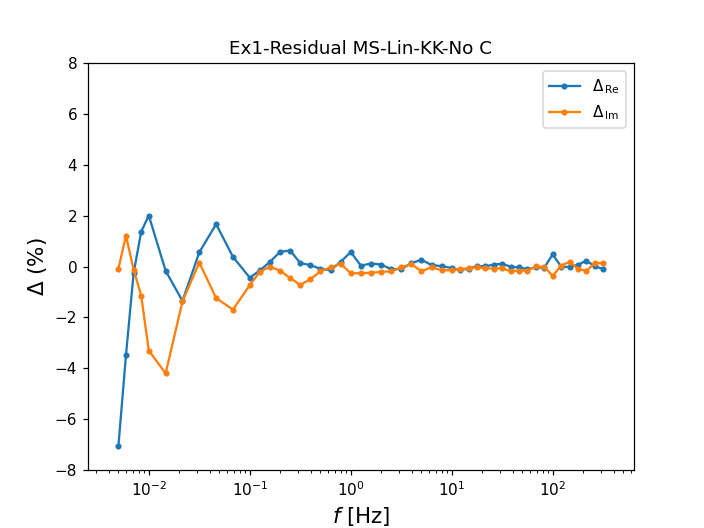

In [49]:
MS_noC_res_real_abs_sum, MS_noC_res_imag_abs_sum = cal_residualAbsSum(residual_arr=MS_noC_residual_arr)
print('MS no C:', MS_noC_res_real_abs_sum, MS_noC_res_imag_abs_sum)

MS no C: 0.24029148164479852 0.21420084897193647


In [52]:
%matplotlib widget
residuals_plot(f=ex1_f_arr, residual_arr=ex1_vogit_noC_residual_arr, fmt='.-', y_limits=(-10, 10),
               title='Ex1-Residual ZZY-Lin-KK-No C')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

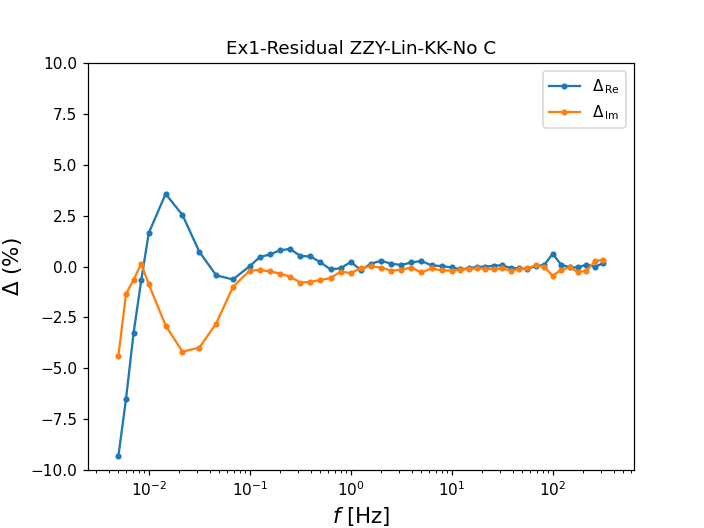

In [48]:
ex1_vogit_noC_res_real_abs_sum, ex1_vogit_noC_res_imag_abs_sum = cal_residualAbsSum(residual_arr=ex1_vogit_noC_residual_arr)
print('ZZY:', ex1_vogit_noC_res_real_abs_sum, ex1_vogit_noC_res_imag_abs_sum)
# MS no C: 0.24029148164479852 0.21420084897193647

ZZY: 0.3703482103030421 0.3115478586718614


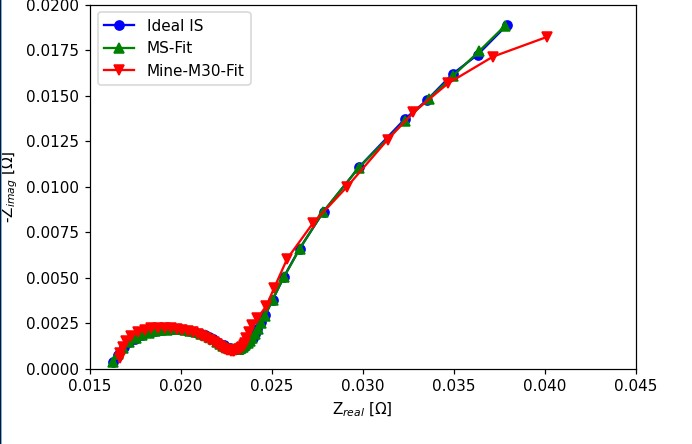

In [47]:
ex1_vogit_M50 = Vogit(impSpe=ex1_IS)
OA_obj_fun_mode = 'both'
ex1_vogit_M50.lin_KK(OA_obj_fun_mode=OA_obj_fun_mode, save_iter=True, u_optimum=0.85, manual_M=50)

In [46]:
# compare nyquist plots of MS-Lin-KK and Mine
ex1_vogit_M50_z_sim_list = ex1_vogit_M50.z_sim_arr.tolist()
ex1_z_MS_sim_list = ex1_z_MS_sim_arr.tolist()
z_pack_list = [ex1_z_arr.tolist(), ex1_z_MS_sim_list, ex1_vogit_M50_z_sim_list]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[0.015, 0.045], y_lim=[0, 0.02], plot_label_list=['Ideal IS', 'MS-Fit','Mine-M50-Fit'])

AttributeError: 'Vogit' object has no attribute 'z_sim_arr'

### impedance

In [6]:
M1, mu1, Z1_linKK, res_real, res_imag = linKK(f=ex1_f_arr,
                                              Z=ex1_z_arr,
                                              c=0.85,
                                              add_cap=True) # f, Z, c=0.85

10 1.0 6.380812348076315e-05


In [7]:
M1, mu1

(18, 0.8037098167201782)

In [10]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex1_f_arr
# plot original data
plot_nyquist(ax1, ex1_f_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z1_linKK, fmt='-', scale=1, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

g:\python\python\pythov3.6.1\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


In [11]:
res_real

array([-4.38434294e-04,  9.42826414e-05,  1.67791782e-03, -5.48374352e-04,
       -1.68629683e-03, -1.44368040e-03,  3.83099305e-03, -7.82925337e-04,
       -2.29415544e-04, -7.03268516e-04, -1.27834656e-04, -1.38864271e-04,
        6.24690656e-04,  2.41760277e-04, -2.99740094e-04,  1.66393175e-04,
       -1.68537880e-04, -3.91174543e-04,  3.00001347e-04,  1.86369742e-04,
       -5.48796531e-04,  8.99868401e-04, -1.75082427e-05, -1.03922722e-03,
       -1.37490618e-04,  1.39679737e-03,  1.89915549e-04, -2.45329729e-03,
        2.35236330e-03, -2.62602212e-04, -1.29873542e-03,  5.73553030e-04,
        1.07173995e-03, -1.22334905e-03,  6.03404072e-04, -2.23879947e-04,
       -7.32360195e-04,  9.73309743e-04,  3.14075415e-04, -1.05114524e-03,
        3.55842685e-04,  7.01230349e-04, -7.60601749e-04, -3.27332681e-04,
        1.48176002e-03, -6.80114613e-04,  3.89021891e-04, -1.62573245e-03,
        9.80419253e-04])

In [12]:
res_imag

array([ 1.45371910e-03,  1.93359901e-03, -9.91833142e-04, -4.26063245e-04,
        1.82248371e-03, -2.88903836e-04, -4.73075916e-03, -1.29214357e-03,
       -8.20366381e-04, -1.99522281e-03, -1.53041640e-03, -1.66993287e-03,
       -4.82688216e-04, -1.02851392e-03, -1.10434894e-03, -1.09879240e-03,
       -1.26526254e-03, -9.35378891e-04, -6.48638141e-04,  1.20624222e-04,
        1.03856044e-03, -1.55991541e-03,  2.09527335e-05, -1.55448522e-03,
       -2.23525392e-03, -9.65875186e-04, -6.43143602e-04, -1.81741231e-03,
       -4.00944350e-03, -2.31798402e-03, -4.15292910e-03, -4.14201672e-03,
       -5.24838425e-03, -7.36215820e-03, -7.75453189e-03, -1.03937931e-02,
       -1.35108533e-02, -1.64127227e-02, -1.86641466e-02, -2.65425528e-02,
       -4.18312535e-02, -5.48851543e-02, -7.50852353e-02, -1.05600880e-01,
       -1.41010816e-01, -1.53381437e-01, -1.77088828e-01, -1.93814137e-01,
       -2.24759302e-01])

In [ ]:
M, mu, Z_linKK, res_real, res_imag = linKK(f=ex1_f_arr,
                                           Z=ex1_z_arr,
                                           c=0.85) # f, Z, c=0.85

In [14]:
M, mu

(18, 0.8037098167201525)

In [15]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex1_f_arr
# plot original data
plot_nyquist(ax1, ex1_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-15-4ed834137506>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])


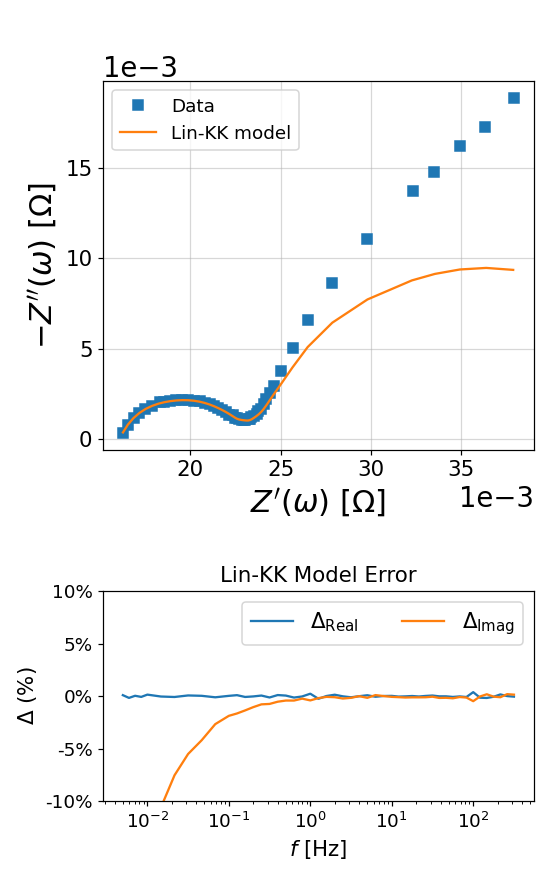

In [16]:
M, mu, Z_linKK, res_real, res_imag = linKK(f=ex1_f_arr,
                                           Z=ex1_z_arr,
                                           c=None,
                                           max_M=30) # f, Z, c=None, max_M=50

In [17]:
M, mu

(30, 0.008251390438387074)

In [19]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex1_f_arr
# plot original data
plot_nyquist(ax1, ex1_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.2, .2)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-19-e08600933f4d>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])


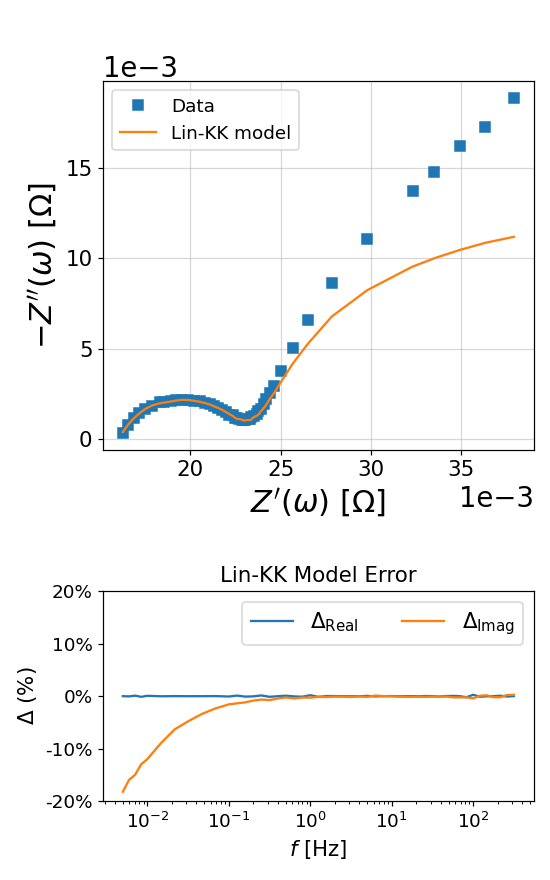

In [49]:
M, mu, Z_linKK, res_real, res_imag = linKK(f=ex1_f_arr,
                                           Z=ex1_z_arr,
                                           c=None,
                                           max_M=50) # f, Z, c=None, max_M=50

In [50]:
M, mu

(50, -3.318228391924194e-05)

In [51]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex1_f_arr
# plot original data
plot_nyquist(ax1, ex1_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-51-4ed834137506>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])


## ex-2

In [52]:
# load data
ex2_data_dict = np.load(os.path.join(lib_res_fp, 'Ex2_LIB_noisy_res.npz'))
ex2_z_arr = ex2_data_dict['z_arr']
print('ex2_z_arr', ex2_z_arr.shape)

ex2_f_arr = ex2_data_dict['fre']
print('ex2_f_arr', ex2_f_arr.shape)

ex2_z_MS_sim_arr = ex2_data_dict['z_sim']
print('ex2_z_MS_sim_arr', ex2_z_MS_sim_arr.shape)

ex2_real_residual_arr = ex2_data_dict['real_residual']
print('ex2_real_residual_arr', ex2_real_residual_arr.shape)

ex2_imag_residual_arr = ex2_data_dict['imag_residual']
print('ex2_imag_residual_arr', ex2_imag_residual_arr.shape)

ex2_z_arr (49,)
ex2_f_arr (49,)
ex2_z_MS_sim_arr (49,)
ex2_real_residual_arr (49,)
ex2_imag_residual_arr (49,)


### impedance

In [22]:
M2, mu2, Z2_linKK, res_real, res_imag = linKK(f=ex2_f_arr,
                                              Z=ex2_z_arr,
                                              c=0.85,
                                              add_cap=True) # f, Z, c=0.85

NameError: name 'ex2_f_arr' is not defined

In [ ]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex2_f_arr
# plot original data
plot_nyquist(ax1, ex2_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z2_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

In [55]:
M2, mu2, Z2_linKK, res_real, res_imag = linKK(f=ex2_f_arr,
                                           Z=ex2_z_arr,
                                           c=0.85) # f, Z, c=0.85

10 1.0 0.00230305225099656


In [56]:
M2, mu2

(15, 0.831551006808756)

In [79]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex2_f_arr
# plot original data
plot_nyquist(ax1, ex2_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z2_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: x and y must have same first dimension, but have shapes (49,) and (69,)

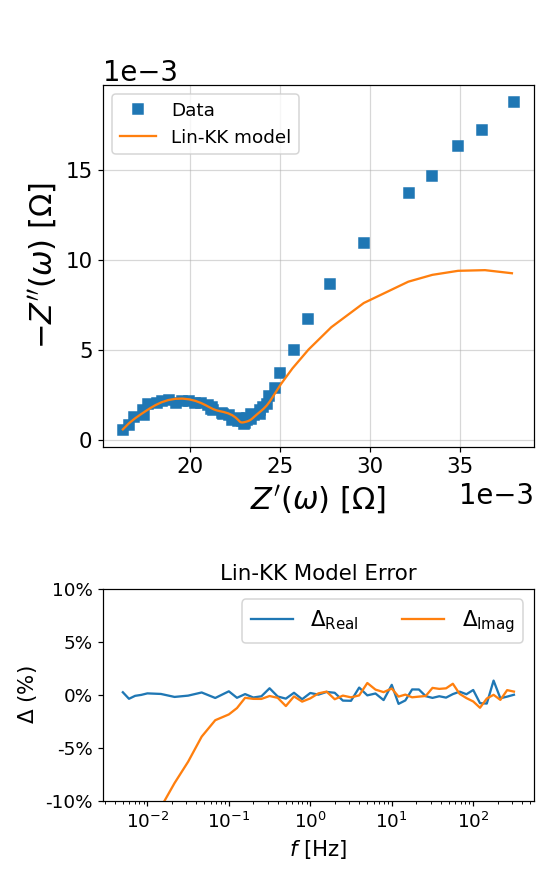

In [62]:
M2, mu2, Z2_linKK, res_real, res_imag = linKK(f=ex2_f_arr,
                                              Z=ex2_z_arr,
                                              c=None,
                                              max_M=30) # f, Z, c=0.85

In [63]:
M2, mu2

(30, 0.002139554666603871)

In [ ]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex2_f_arr
# plot original data
plot_nyquist(ax1, ex2_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z2_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

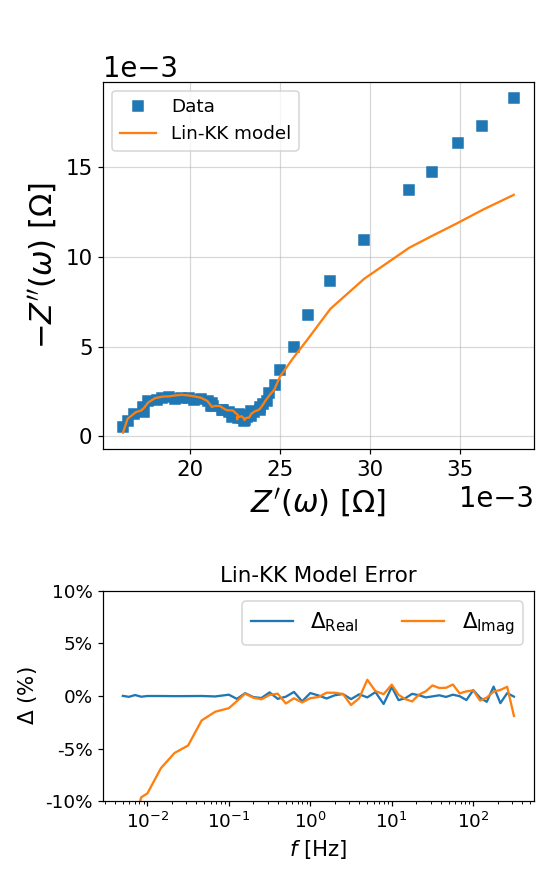

## ex-3

In [65]:
# load data
ex3_data_dict = np.load(os.path.join(lib_res_fp, 'Ex3_LIB_outlier_res.npz'))
ex3_z_arr = ex3_data_dict['z_arr']
print('ex3_z_arr', ex3_z_arr.shape)

ex3_f_arr = ex3_data_dict['fre']
print('ex3_f_arr', ex3_f_arr.shape)

ex3_z_MS_sim_arr = ex3_data_dict['z_sim']
print('ex3_z_MS_sim_arr', ex3_z_MS_sim_arr.shape)

ex3_real_residual_arr = ex3_data_dict['real_residual']
print('ex3_real_residual_arr', ex3_real_residual_arr.shape)

ex3_imag_residual_arr = ex3_data_dict['imag_residual']
print('ex3_imag_residual_arr', ex3_imag_residual_arr.shape)

ex3_z_arr (49,)
ex3_f_arr (49,)
ex3_z_MS_sim_arr (49,)
ex3_real_residual_arr (49,)
ex3_imag_residual_arr (49,)


### impedance

In [70]:
M3, mu3, Z3_linKK, res_real, res_imag = linKK(f=ex3_f_arr,
                                              Z=ex3_z_arr,
                                              c=0.85) # f, Z, c=0.85

10 1.0 0.0024062045047693642


In [71]:
M3, mu3

(14, 0.693217547774327)

In [72]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex3_f_arr
# plot original data
plot_nyquist(ax1, ex3_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z3_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-72-d920cc81ec25>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])


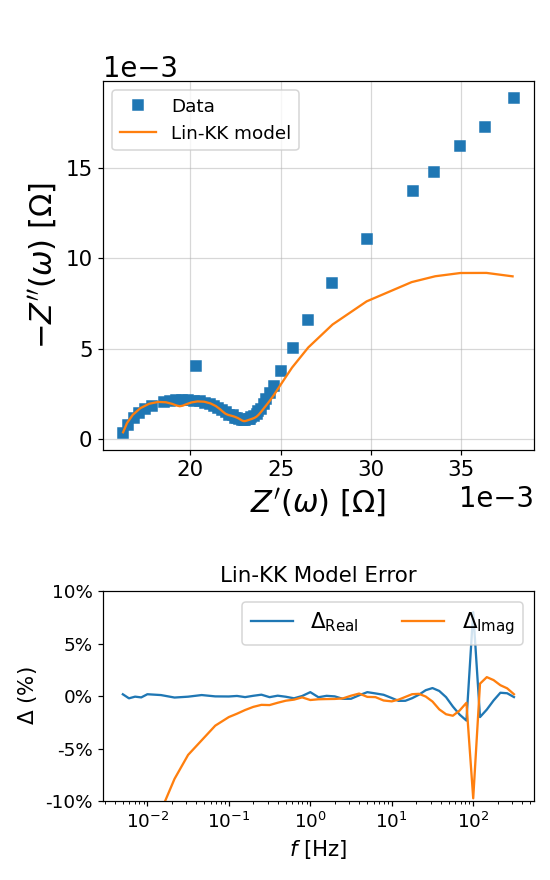

## ex-4

In [74]:
# load data
ex4_data_dict = np.load(os.path.join(lib_res_fp, 'Ex4_LIB_time_variant_res.npz'))
ex4_z_arr = ex4_data_dict['z_arr']
print('ex4_z_arr', ex4_z_arr.shape)

ex4_f_arr = ex4_data_dict['fre']
print('ex4_f_arr', ex4_f_arr.shape)

ex4_z_MS_sim_arr = ex4_data_dict['z_sim']
print('ex4_z_MS_sim_arr', ex4_z_MS_sim_arr.shape)

ex4_real_residual_arr = ex4_data_dict['real_residual']
print('ex4_real_residual_arr', ex4_real_residual_arr.shape)

ex4_imag_residual_arr = ex4_data_dict['imag_residual']
print('ex4_imag_residual_arr', ex4_imag_residual_arr.shape)

ex4_z_arr (69,)
ex4_f_arr (69,)
ex4_z_MS_sim_arr (69,)
ex4_real_residual_arr (69,)
ex4_imag_residual_arr (69,)


### impedance

In [75]:
M4, mu4, Z4_linKK, res_real, res_imag = linKK(f=ex4_f_arr,
                                              Z=ex4_z_arr,
                                              c=0.85) # f, Z, c=0.85

10 1.0 0.008515254851601579
20 0.8193113619793464 0.007460902677419741


In [76]:
M4, mu4

(20, 0.8193113619793464)

In [77]:
fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=ex4_f_arr
# plot original data
plot_nyquist(ax1, ex4_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z4_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-77-b6a1e1a95171>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])


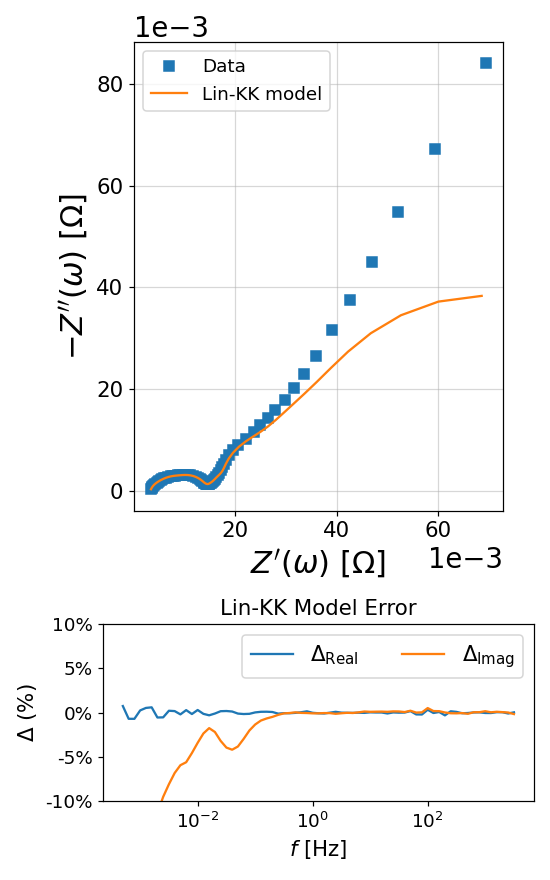

# R(RC)模拟数据上进行 Lin-KK实验

## 理想数据

In [4]:
RaRCb_ecm = load_pickle_file(fp='./rbp_files/0/R(RC)_ecm_pkl/', fn='2021_08_04_ecm.pkl')
print(len(RaRCb_ecm.z_sim_list))
print(RaRCb_ecm.w_arr)
print(RaRCb_ecm.z_sim_list)

50
[6.28318531e+07 3.96442192e+07 2.50138112e+07 1.57826479e+07
 9.95817762e+06 6.28318531e+06 3.96442192e+06 2.50138112e+06
 1.57826479e+06 9.95817762e+05 6.28318531e+05 3.96442192e+05
 2.50138112e+05 1.57826479e+05 9.95817762e+04 6.28318531e+04
 3.96442192e+04 2.50138112e+04 1.57826479e+04 9.95817762e+03
 6.28318531e+03 3.96442192e+03 2.50138112e+03 1.57826479e+03
 9.95817762e+02 6.28318531e+02 3.96442192e+02 2.50138112e+02
 1.57826479e+02 9.95817762e+01 6.28318531e+01 3.96442192e+01
 2.50138112e+01 1.57826479e+01 9.95817762e+00 6.28318531e+00
 3.96442192e+00 2.50138112e+00 1.57826479e+00 9.95817762e-01
 6.28318531e-01 3.96442192e-01 2.50138112e-01 1.57826479e-01
 9.95817762e-02 6.28318531e-02 3.96442192e-02 2.50138112e-02
 1.57826479e-02 9.95817762e-03]
[(100.00000000019789-0.00019894367886467228j), (100.00000000049708-0.0003153044823153175j), (100.00000000124862-0.0004997239275721447j), (100.00000000313639-0.0007920090509115456j), (100.00000000787826-0.0012552497531275358j), (100.0

In [5]:
RaRCb_ecm.__dir__()

['ecm_serial',
 'proba',
 'limit_arr',
 'limit_list',
 'para_arr',
 'fre_arr',
 'w_arr',
 'z_sim_list',
 '__module__',
 '__init__',
 'modify_para_limit_range',
 'simulate',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [8]:
print(RaRCb_ecm.para_arr)

None


In [5]:
RaRCb_w_arr = RaRCb_ecm.w_arr
RaRCb_z_arr = np.array(RaRCb_ecm.z_sim_list)
RaRCb_f = RaRCb_w_arr / (2 * math.pi)

In [17]:
RaRCb_f

array([1.00000000e+07, 6.30957344e+06, 3.98107171e+06, 2.51188643e+06,
       1.58489319e+06, 1.00000000e+06, 6.30957344e+05, 3.98107171e+05,
       2.51188643e+05, 1.58489319e+05, 1.00000000e+05, 6.30957344e+04,
       3.98107171e+04, 2.51188643e+04, 1.58489319e+04, 1.00000000e+04,
       6.30957344e+03, 3.98107171e+03, 2.51188643e+03, 1.58489319e+03,
       1.00000000e+03, 6.30957344e+02, 3.98107171e+02, 2.51188643e+02,
       1.58489319e+02, 1.00000000e+02, 6.30957344e+01, 3.98107171e+01,
       2.51188643e+01, 1.58489319e+01, 1.00000000e+01, 6.30957344e+00,
       3.98107171e+00, 2.51188643e+00, 1.58489319e+00, 1.00000000e+00,
       6.30957344e-01, 3.98107171e-01, 2.51188643e-01, 1.58489319e-01,
       1.00000000e-01, 6.30957344e-02, 3.98107171e-02, 2.51188643e-02,
       1.58489319e-02, 1.00000000e-02, 6.30957344e-03, 3.98107171e-03,
       2.51188643e-03, 1.58489319e-03])

In [15]:
np.real(RaRCb_z_arr)

array([100.        , 100.        , 100.        , 100.        ,
       100.00000001, 100.00000002, 100.00000005, 100.00000012,
       100.00000031, 100.00000079, 100.00000198, 100.00000497,
       100.00001249, 100.00003136, 100.00007878, 100.00019789,
       100.00049708, 100.00124861, 100.00313634, 100.00787795,
       100.01978734, 100.04969611, 100.1247841 , 100.31314809,
       100.7847348 , 101.95954041, 104.85029547, 111.75248103,
       127.11219387, 156.51902088, 199.47044468, 242.61815426,
       272.38751399, 288.01099997, 295.04843847, 297.99892879,
       299.19853265, 299.68015865, 299.87254618, 299.94924025,
       299.97978909, 299.9919534 , 299.99679651, 299.99872466,
       299.99949227, 299.99979787, 299.99991953, 299.99996796,
       299.99998725, 299.99999492])

In [16]:
np.imag(RaRCb_z_arr)

array([-1.98943679e-04, -3.15304482e-04, -4.99723928e-04, -7.92009051e-04,
       -1.25524975e-03, -1.98943679e-03, -3.15304482e-03, -4.99723927e-03,
       -7.92009050e-03, -1.25524975e-02, -1.98943677e-02, -3.15304474e-02,
       -4.99723896e-02, -7.92008927e-02, -1.25524926e-01, -1.98943482e-01,
       -3.15303699e-01, -4.99720808e-01, -7.91996631e-01, -1.25520031e+00,
       -1.98923996e+00, -3.15226135e+00, -4.99412140e+00, -7.90768970e+00,
       -1.25032456e+01, -1.96994488e+01, -3.07657883e+01, -4.70358948e+01,
       -6.84643536e+01, -9.00522318e+01, -9.99985978e+01, -9.04637658e+01,
       -6.89930998e+01, -4.74769827e+01, -3.10772319e+01, -1.99050234e+01,
       -1.26353125e+01, -7.99161888e+00, -5.04722884e+00, -3.18580808e+00,
       -2.01041612e+00, -1.26856397e+00, -8.00429139e-01, -5.05041513e-01,
       -3.18660875e-01, -2.01061727e-01, -1.26861450e-01, -8.00441832e-02,
       -5.05044701e-02, -3.18661676e-02])

In [15]:
RaRCb_w_arr

array([6.28318531e+07, 3.96442192e+07, 2.50138112e+07, 1.57826479e+07,
       9.95817762e+06, 6.28318531e+06, 3.96442192e+06, 2.50138112e+06,
       1.57826479e+06, 9.95817762e+05, 6.28318531e+05, 3.96442192e+05,
       2.50138112e+05, 1.57826479e+05, 9.95817762e+04, 6.28318531e+04,
       3.96442192e+04, 2.50138112e+04, 1.57826479e+04, 9.95817762e+03,
       6.28318531e+03, 3.96442192e+03, 2.50138112e+03, 1.57826479e+03,
       9.95817762e+02, 6.28318531e+02, 3.96442192e+02, 2.50138112e+02,
       1.57826479e+02, 9.95817762e+01, 6.28318531e+01, 3.96442192e+01,
       2.50138112e+01, 1.57826479e+01, 9.95817762e+00, 6.28318531e+00,
       3.96442192e+00, 2.50138112e+00, 1.57826479e+00, 9.95817762e-01,
       6.28318531e-01, 3.96442192e-01, 2.50138112e-01, 1.57826479e-01,
       9.95817762e-02, 6.28318531e-02, 3.96442192e-02, 2.50138112e-02,
       1.57826479e-02, 9.95817762e-03])

In [56]:
%matplotlib widget
nyquist_plot_1(z_list=RaRCb_z_arr, x_lim=[50, 350], y_lim=[0, 150], plot_label='Ideal R(RC) IS')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

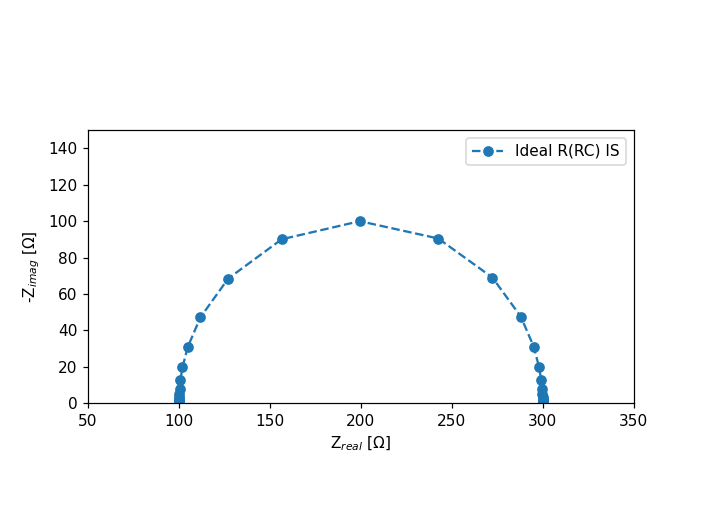

#### Impedance - Lin-KK检测

##### Real fit

In [6]:
from impedance.validation import linKK
# c85_ == c = 0.85
c85_realFit_M, c85_realFit_mu, c85_realFit_Z_linKK, c85_realFit_res_real, c85_realFit_res_imag = linKK(f=RaRCb_f, Z=RaRCb_z_arr, c=0.85, max_M=50, fit_type='real', add_cap=False) # f, Z, c=0.85, max_M=50

In [17]:
c85_realFit_M

4

In [7]:
z_pack_list = [RaRCb_ecm.z_sim_list, c85_realFit_Z_linKK.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[0, 150], plot_label_list=['Ideal R(RC) IS', 'Impedance-Real Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

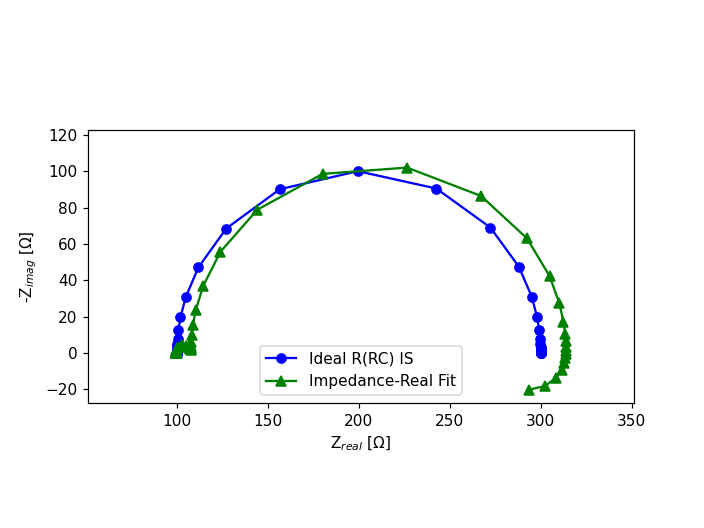

##### Imag fit

In [8]:
# c85_ == c = 0.85
c85_imagFit_M, c85_imagFit_mu, c85_imagFit_Z_linKK, c85_imagFit_res_real, c85_imagFit_res_imag = linKK(f=RaRCb_f, Z=RaRCb_z_arr, c=0.85, max_M=50, fit_type='imag', add_cap=False) # f, Z, c=0.85, max_M=50

10 0.7884094070113977 16.18952955937094


In [16]:
c85_imagFit_M

10

In [9]:
z_pack_list = [RaRCb_ecm.z_sim_list, c85_imagFit_Z_linKK.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[0, 150], plot_label_list=['Ideal R(RC) IS', 'Impedance-Imag Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

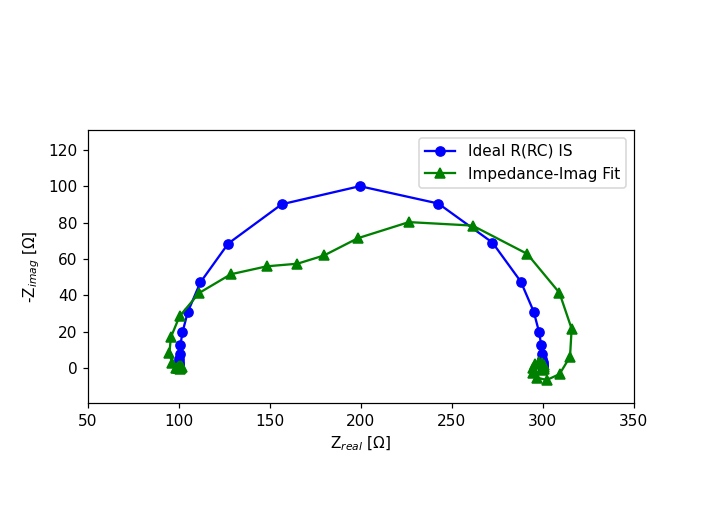

##### Complex fit

In [10]:
from impedance.validation import linKK
# c85_ == c = 0.85
c85_complexFit_M, c85_complexFit_mu, c85_complexFit_Z_linKK, c85_complexFit_res_real, c85_complexFit_res_imag = linKK(f=RaRCb_f, Z=RaRCb_z_arr, c=0.85, max_M=50, fit_type='complex', add_cap=False) # f, Z, c=0.85, max_M=50

10 0.77704491779563 16.329887796115848


In [15]:
c85_complexFit_M

10

In [12]:
z_pack_list = [RaRCb_ecm.z_sim_list, c85_complexFit_Z_linKK.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[0, 150], plot_label_list=['Ideal R(RC) IS', 'Impedance-Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

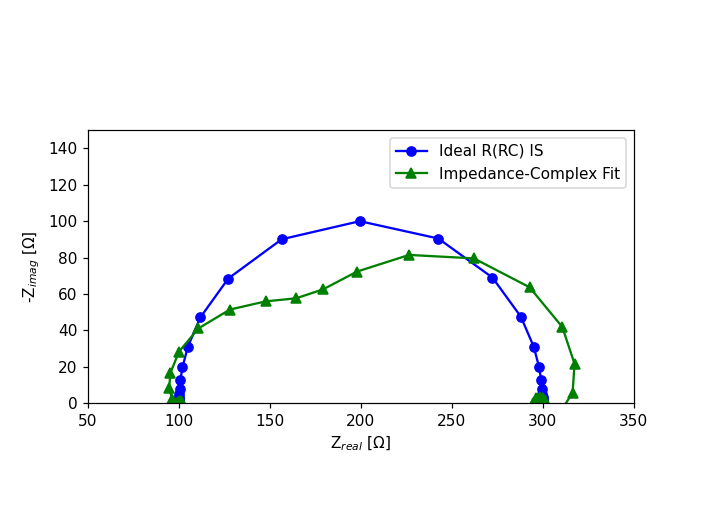

In [ ]:
# compare nyquist plots of MS-Lin-KK and Mine
ex1_z_MS_sim_noC_list = ex1_z_MS_sim_noC_arr.tolist()
ex1_vogit_noC.simulate_Z()
z_pack_list = [ex1_z_arr.tolist(), ex1_z_MS_sim_noC_list, ex1_vogit_noC.z_sim_arr.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[0.015, 0.045], y_lim=[0, 0.02], plot_label_list=['Ideal IS', 'MS-Fit','Mine-Fit'])

In [13]:
from impedance.validation import linKK
M, mu, Z_linKK, res_real, res_imag = linKK(f=RaRCb_f,
                                           Z=RaRCb_z_arr,
                                           max_M=35) # f, Z, c=0.85, max_M=50

In [20]:
from impedance.validation import linKK
M, mu, Z_linKK, res_real, res_imag = linKK(f=RaRCb_f,
                                           Z=RaRCb_z_arr,
                                           c = None,
                                           max_M=35) # f, Z, c=0.85, max_M=50

In [21]:
M, mu

(35, 0.7221107779806093)

M才等于4，感觉不靠谱

In [22]:
%matplotlib widget
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,8))
# fig = plt.figure()
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

f=RaRCb_f
# plot original data
plot_nyquist(ax1, RaRCb_z_arr, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-22-9459d9a2cda6>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])


下图是Impedance，Lin-KK自动选择M（M=4）的结果

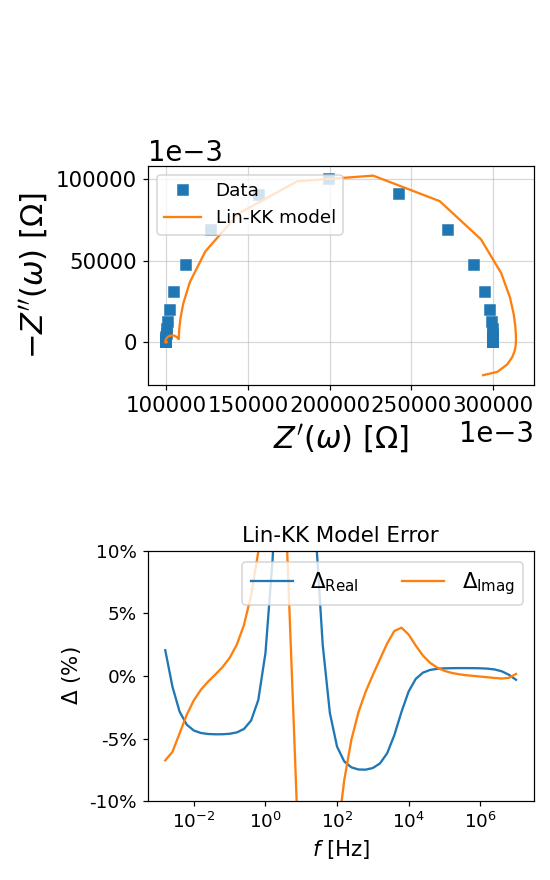

下图是Impedance，Lin-KK 手动选择M=35的结果

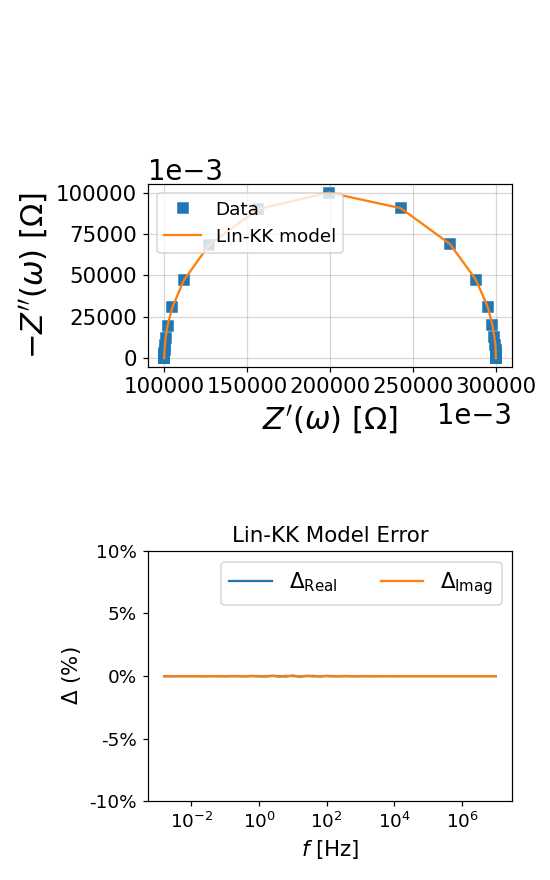

#### PyEIS检测

PyEIS 只能读取固定的几种格式的实验文件

![img](./rbp_files/1/img/pyEIS_file_reader_code.jpg)

#### AIA-IS

In [13]:
from IS.IS import IS_0
RaRCb_IS = IS_0()
RaRCb_IS.read_from_EcmCls(fp='./rbp_files/0/R(RC)_ecm_pkl/', fn='2021_08_04_ecm.pkl')

##### Real Fit

In [14]:
RaRCb_vogit_realFit = Vogit_3(impSpe=RaRCb_IS, fit_type='real', u_optimum=0.85, add_C=False)
RaRCb_vogit_realFit.lin_KK()

M =  2
M =  3
M =  4


In [19]:
RaRCb_vogit_realFit.simulate_Z()
z_pack_list = [RaRCb_ecm.z_sim_list, RaRCb_vogit_realFit.z_sim_arr.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[0, 150], plot_label_list=['Ideal R(RC) IS', 'ZZY-Real Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

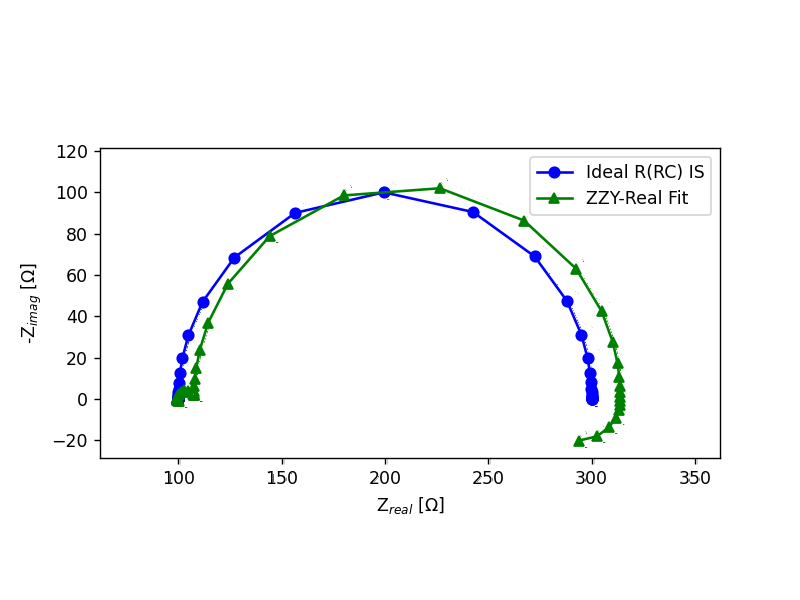

##### Imag Fit

In [20]:
RaRCb_vogit_imagFit = Vogit_3(impSpe=RaRCb_IS, fit_type='imag', u_optimum=0.85, add_C=False)
RaRCb_vogit_imagFit.lin_KK()

M =  2
M =  3
M =  4
M =  5
M =  6
M =  7
M =  8
M =  9
M =  10


In [21]:
RaRCb_vogit_imagFit.simulate_Z()
z_pack_list = [RaRCb_ecm.z_sim_list, RaRCb_vogit_imagFit.z_sim_arr.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[0, 150], plot_label_list=['Ideal R(RC) IS', 'ZZY-Imag Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

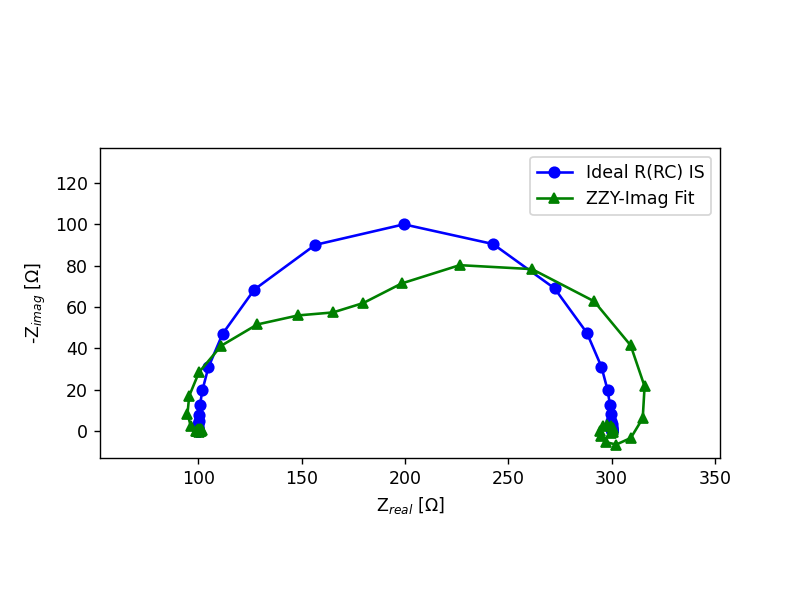

##### Complex Fit

In [22]:
RaRCb_vogit_complexFit = Vogit_3(impSpe=RaRCb_IS, fit_type='complex', u_optimum=0.85, add_C=False)
RaRCb_vogit_complexFit.lin_KK()

M =  2
M =  3
M =  4
M =  5
M =  6
M =  7
M =  8
M =  9
M =  10


In [76]:
RaRCb_vogit_complexFit.simulate_Z()
RaRCb_vogit_complexFit.z_sim_arr.shape

(50,)

In [28]:
RaRCb_vogit_complexFit.simulate_Z()
z_pack_list = [RaRCb_ecm.z_sim_list, RaRCb_vogit_complexFit.z_sim_arr.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 330], y_lim=[-20, 130], plot_label_list=['Ideal R(RC) IS', 'ZZY-Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

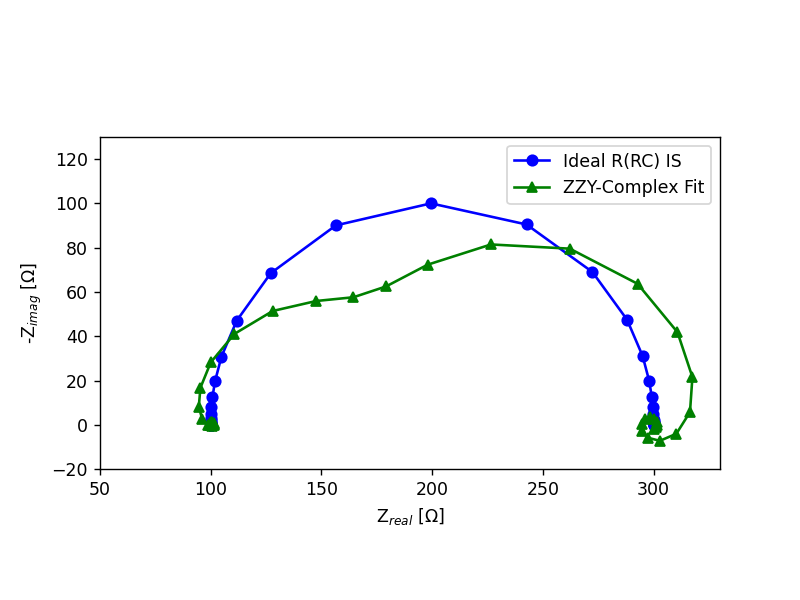

##### other

obj-fun-mode = 'both' u = 0.85

In [8]:
RaRCb_M30_vogit = Vogit(impSpe=RaRCb_IS)
OA_obj_fun_mode = 'both'
RaRCb_M30_vogit.lin_KK(OA_obj_fun_mode=OA_obj_fun_mode, save_iter=True, manual_M=30)

In [9]:
%matplotlib widget
nyquist_plot_1(z_list=RaRCb_M30_vogit.z_sim_arr.tolist(), x_lim=[50, 350], y_lim=[0, 150])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [90]:
nyquist_multiPlots_1(z_pack_list=[RaRCb_ecm.z_sim_list, RaRCb_vogit.z_sim_arr.tolist()], x_lim=[50, 350], y_lim=[-10, 150], 
                     img_dict=None, grid_flag=False, plot_label_list=['R(RC)','Lin-KK(Vogit)'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

obj-fun-mode = 'both'

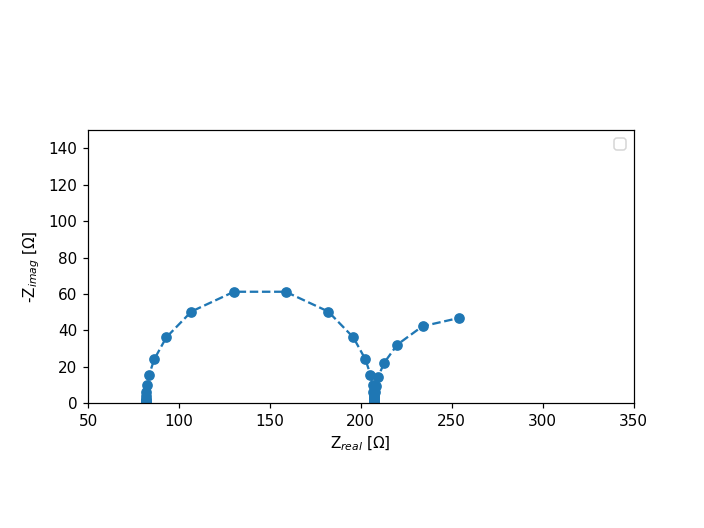

obj-fun-mode = 'imag'

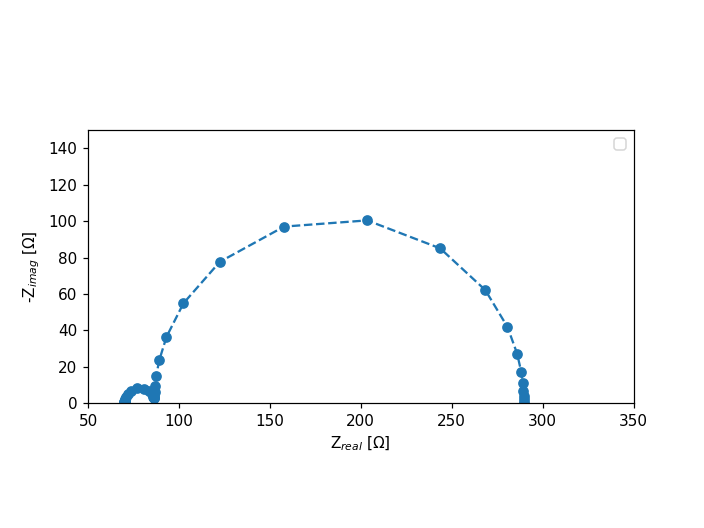

In [10]:
nyquist_multiPlots_1(z_pack_list=[RaRCb_ecm.z_sim_list, RaRCb_vogit.z_sim_arr.tolist()], x_lim=[50, 350], y_lim=[-10, 150], 
                     img_dict=None, grid_flag=False, plot_label_list=['R(RC)','Lin-KK(Vogit)'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

obj-fun-mode = 'both'

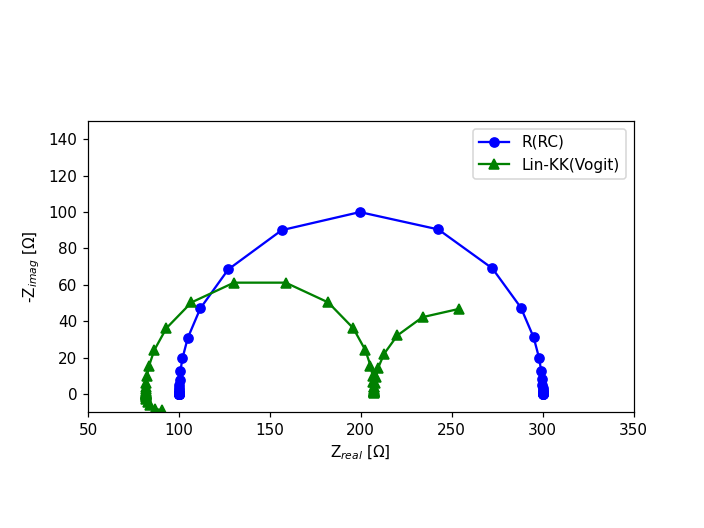

obj-fun-mode = 'imag'

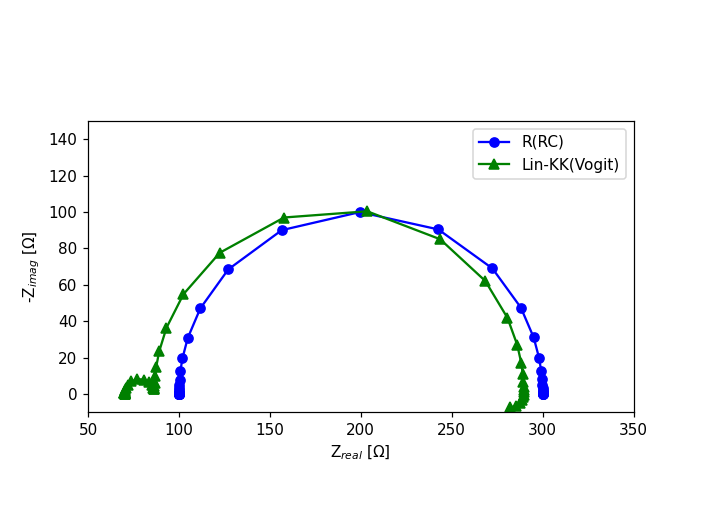

In [13]:
len(real_residual_list), real_residual_list

(50,
 [0.3028554024794349,
  0.3008946539379535,
  0.29954692609561395,
  0.2988409474374019,
  0.2985223895237544,
  0.2983865141298985,
  0.2983252476964029,
  0.2982854603189999,
  0.29823138767937585,
  0.29811399679548156,
  0.29782713232151226,
  0.2971138781552436,
  0.29535075696645263,
  0.2910877540610288,
  0.28132067510527714,
  0.26146376773410573,
  0.22937624339208978,
  0.19278805714596348,
  0.16452162111133678,
  0.14857225548127553,
  0.14117158971135493,
  0.13817438291371698,
  0.13734832691728632,
  0.13802060725177404,
  0.14077805362312298,
  0.1478997138260351,
  0.164575658210438,
  0.19981533613718022,
  0.26288398398386637,
  0.3509674135210152,
  0.4346436941434229,
  0.46405510848389325,
  0.4078020384132856,
  0.2894129645605995,
  0.17329208627695553,
  0.09892624940426954,
  0.06190511316810855,
  0.0456738873723318,
  0.038950715609509204,
  0.0362333033924428,
  0.03515083514769342,
  0.03473472230822526,
  0.034608872981885926,
  0.034658809567715027

In [14]:
RaRCb_f

array([1.00000000e+07, 6.30957344e+06, 3.98107171e+06, 2.51188643e+06,
       1.58489319e+06, 1.00000000e+06, 6.30957344e+05, 3.98107171e+05,
       2.51188643e+05, 1.58489319e+05, 1.00000000e+05, 6.30957344e+04,
       3.98107171e+04, 2.51188643e+04, 1.58489319e+04, 1.00000000e+04,
       6.30957344e+03, 3.98107171e+03, 2.51188643e+03, 1.58489319e+03,
       1.00000000e+03, 6.30957344e+02, 3.98107171e+02, 2.51188643e+02,
       1.58489319e+02, 1.00000000e+02, 6.30957344e+01, 3.98107171e+01,
       2.51188643e+01, 1.58489319e+01, 1.00000000e+01, 6.30957344e+00,
       3.98107171e+00, 2.51188643e+00, 1.58489319e+00, 1.00000000e+00,
       6.30957344e-01, 3.98107171e-01, 2.51188643e-01, 1.58489319e-01,
       1.00000000e-01, 6.30957344e-02, 3.98107171e-02, 2.51188643e-02,
       1.58489319e-02, 1.00000000e-02, 6.30957344e-03, 3.98107171e-03,
       2.51188643e-03, 1.58489319e-03])

In [16]:
# 画 实部和虚部的残差图
real_residual_list = RaRCb_vogit.real_residual_list[-1]
imag_residual_list = RaRCb_vogit.imag_residual_list[-1]

%matplotlib widget
residuals_plot(f=RaRCb_f, res_real_arr=np.array(real_residual_list) , res_imag_arr=np.array(imag_residual_list) , fmt='.-', y_limits=(-50, 50))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

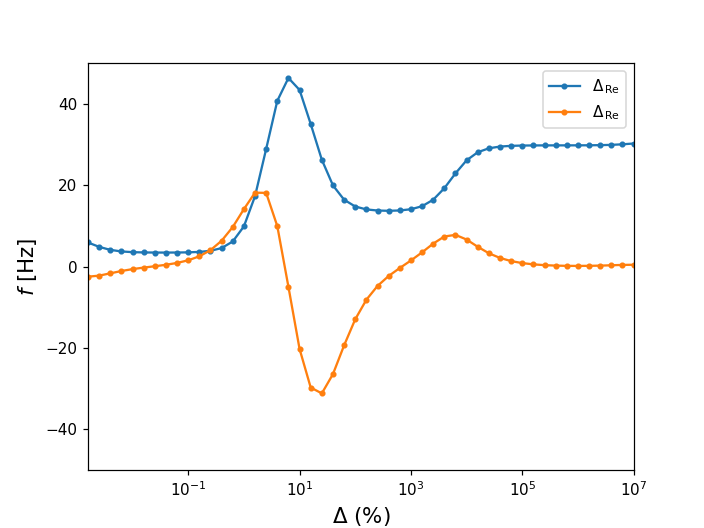

In [11]:
RaRCb_M10_vogit = Vogit(impSpe=RaRCb_IS)
OA_obj_fun_mode = 'both'
RaRCb_M10_vogit.lin_KK(OA_obj_fun_mode=OA_obj_fun_mode, save_iter=True, manual_M=10)
# both M= 10 u= 0.6195438275936603
# M= 10 u= 0.659172947018016

M= 10 u= 0.659172947018016


In [12]:
nyquist_multiPlots_1(z_pack_list=[RaRCb_ecm.z_sim_list, RaRCb_M10_vogit.z_sim_arr.tolist()], x_lim=[50, 350], y_lim=[-10, 150], 
                     img_dict=None, grid_flag=False, plot_label_list=['R(RC)','Lin-KK(Vogit)-M10'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

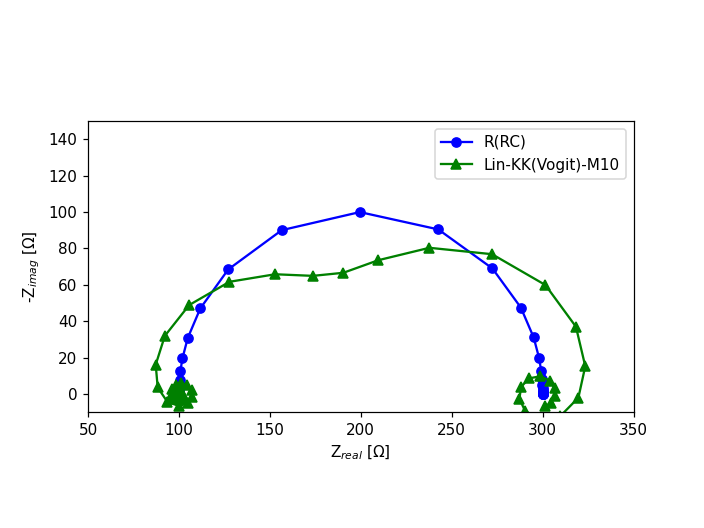

In [13]:
RaRCb_M20_vogit = Vogit(impSpe=RaRCb_IS)
OA_obj_fun_mode = 'both'
RaRCb_M20_vogit.lin_KK(OA_obj_fun_mode=OA_obj_fun_mode, save_iter=True, manual_M=20)
# M= 20 u= 0.8096637464897635

M= 20 u= 0.8096637464897635


In [14]:
nyquist_multiPlots_1(z_pack_list=[RaRCb_ecm.z_sim_list, RaRCb_M20_vogit.z_sim_arr.tolist()], x_lim=[50, 350], y_lim=[-10, 150], 
                     img_dict=None, grid_flag=False, plot_label_list=['R(RC)','Lin-KK(Vogit)-M20'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### R(RC)+高频+剧烈扰动

加载之前生成的数据，先挑一个异常点明显的，分别用Impedance、PyEIS和AIA-IS进行检测

#### AIA-IS检测

# R(RC)-1 模拟数据上进行 Lin-KK实验

**R(RC)-1 和 R(RC)的区别在于 R(RC)-1 涉及的高低频率的范围更短，高低频的点较为稀疏**

## 理想数据

In [29]:
RaRCb1_ecm = load_pickle_file(fp='./rbp_files/0/R(RC)1_ecm_pkl/', fn='2021_09_07_ecm1.pkl')

In [30]:
RaRCb1_w_arr = RaRCb1_ecm.w_arr
RaRCb1_z_arr = RaRCb1_ecm.z_sim_arr
RaRCb1_f_arr = RaRCb1_ecm.fre_arr

#### Impedance - Lin-KK检测

##### Real Fit

In [31]:
from impedance.validation import linKK
# c85_ == c = 0.85
c85_realFit_M, c85_realFit_mu, c85_realFit_Z_linKK, c85_realFit_res_real, c85_realFit_res_imag = linKK(f=RaRCb1_f_arr, Z=RaRCb1_z_arr, c=0.85, max_M=50, fit_type='real', add_cap=False) # f, Z, c=0.85, max_M=50

In [14]:
c85_realFit_M

5

In [15]:
z_pack_list = [RaRCb1_ecm.z_sim_arr.tolist(), c85_realFit_Z_linKK.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[-50, 100], plot_label_list=['Ideal R(RC)-1 IS', 'Impedance-Real Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

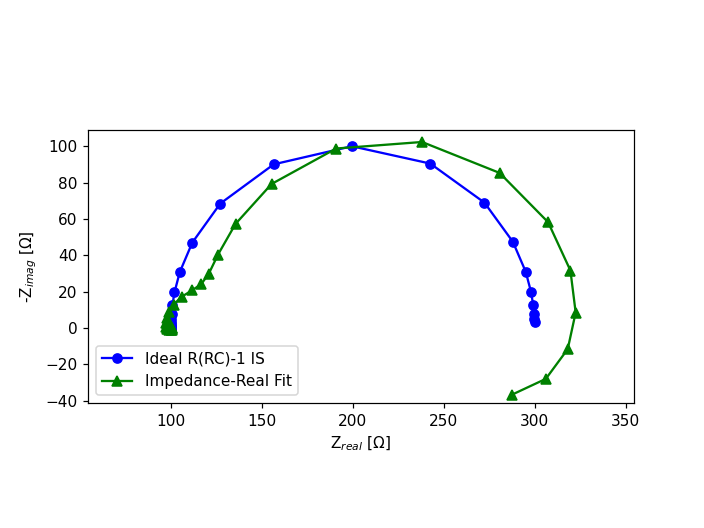

##### Imag Fit

In [20]:
# c85_ == c = 0.85
c85_imagFit_M, c85_imagFit_mu, c85_imagFit_Z_linKK, c85_imagFit_res_real, c85_imagFit_res_imag = linKK(f=RaRCb1_f_arr, Z=RaRCb1_z_arr, c=0.85, max_M=50, fit_type='imag', add_cap=False) # f, Z, c=0.85, max_M=50

[ 9.52624988e+01  4.31740533e+00 -3.78193838e+00  2.61965489e+01
  2.15816624e+02 -3.59671293e+01  3.52318484e-06]


In [21]:
c85_imagFit_M

5

In [22]:
z_pack_list = [RaRCb1_ecm.z_sim_arr.tolist(), c85_imagFit_Z_linKK.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[-50, 100], plot_label_list=['Ideal R(RC)-1 IS', 'Impedance-Imag Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

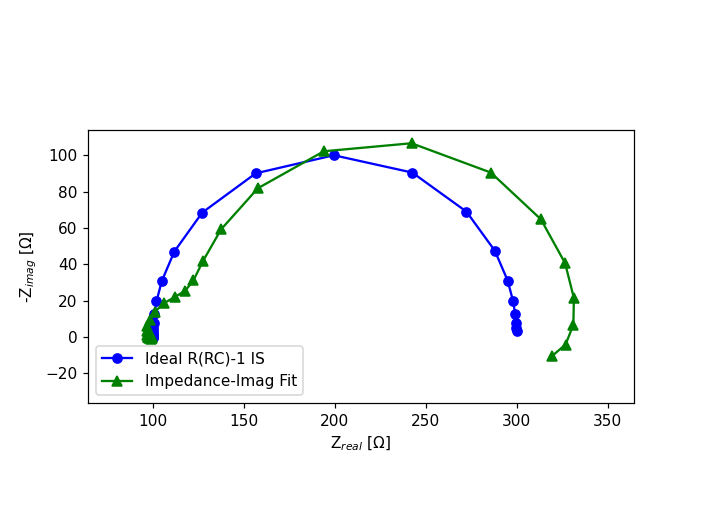

##### Complex Fit

In [23]:
# c85_ == c = 0.85
c85_complexFit_M, c85_complexFit_mu, c85_complexFit_Z_linKK, c85_complexFit_res_real, c85_complexFit_res_imag = linKK(f=RaRCb1_f_arr, Z=RaRCb1_z_arr, c=0.85, max_M=50, fit_type='complex', add_cap=False) # f, Z, c=0.85, max_M=50

[ 9.83141530e+01  2.43110870e+00 -4.52206964e+00  2.47196667e+01
  2.07685486e+02 -4.85963164e+01  1.44844550e-06]


In [24]:
c85_complexFit_M

5

In [27]:
z_pack_list = [RaRCb1_ecm.z_sim_arr.tolist(), c85_complexFit_Z_linKK.tolist()]
nyquist_multiPlots_1(z_pack_list=z_pack_list, x_lim=[50, 350], y_lim=[-50, 100], plot_label_list=['Ideal R(RC)-1 IS', 'Impedance-Complex Fit'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

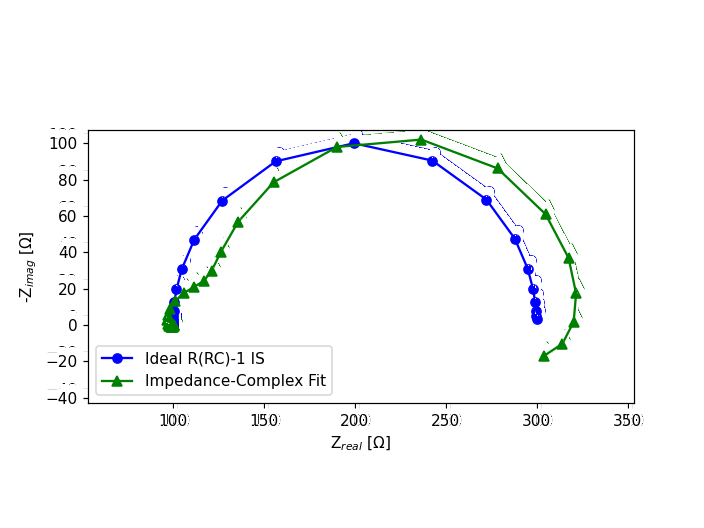

+ 小结
    1. Impedance的real/imag/complex fit都不好使

# 比较Impedance、PyEIS和AIA-IS对Linear-KK的实现

## Impedance实现Linear-KK

## PyEIS实现Linear-KK

## AIA-IS实现Linear-KK

# 测试模拟Vogit的写法是否正确

In [129]:
import numpy as np

In [146]:
Rs = 60
Cs = 1e-3
Ls = 1e-5
RC_para_list = [[10, 0.01], [50, 0.0005],[200, 0.00003]]
R_list = [10, 50, 200]
tao_list = [rc[0] * rc[1] for rc in RC_para_list]
tao_list

[0.1, 0.025, 0.006]

In [95]:
from utils.frequency_generator import fre_generator
%matplotlib widget
from utils.visualize_utils.impedance_plots import nyquist_multiPlots_1, nyquist_plot_1

fre_list, w_list = fre_generator(f_start=4, f_end=0, pts_decade=5)

## vogit_no_C

In [34]:
from circuits.elements import ele_C

def vogit_no_C(w_list, Rs, RC_para_list):
    R0,C0 = RC_para_list[0]
    R1,C1 = RC_para_list[1]
    R2,C2 = RC_para_list[2]
    
    z_list = [Rs + 1 / (1/R0 + 1/ele_C(w, C0)) + 1 / (1/R1 + 1/ele_C(w, C1)) + 1 / (1/R2 + 1/ele_C(w, C2)) for w in w_list]
    return np.array(z_list)

## vogit_add_CL

In [154]:
def vogit_add_CL(w_list, Rs, RC_para_list, Cs, Ls):
    R0, C0 = RC_para_list[0]
    R1, C1 = RC_para_list[1]
    R2, C2 = RC_para_list[2]
    
    z_list = [Rs + ele_C(w, Cs) + 1 / (1/R0 + 1/ele_C(w, C0)) + 1 / (1/R1 + 1/ele_C(w, C1)) + 1 / (1/R2 + 1/ele_C(w, C2)) + 1j*w*Ls for w in w_list]
    return np.array(z_list)

In [155]:
vogit_add_CL_arr = vogit_add_CL(w_list, Rs, RC_para_list, Cs, Ls)

In [156]:
%matplotlib widget
nyquist_plot_1(z_list=vogit_add_CL_arr, x_lim=[40, 350], y_lim=[-10, 150])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


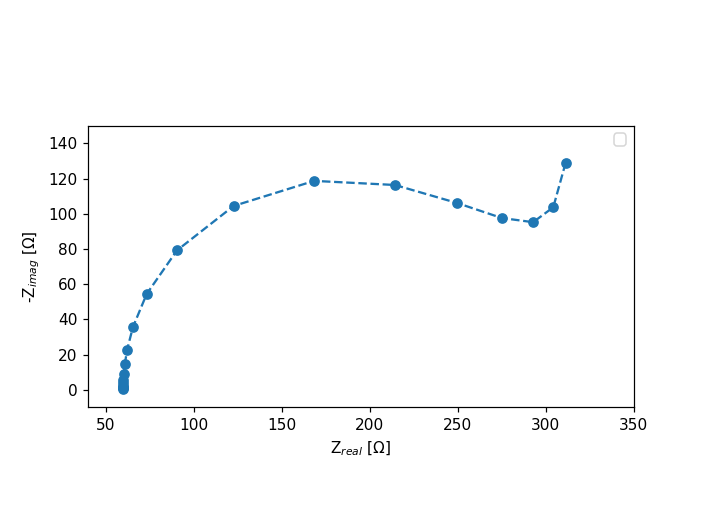

## simulate_Z_addCL

In [161]:
from circuits.circuit_pack import aRCb

def simulate_Z_addCL(w_list, Rs, Cs, RC_para_list, Ls):
    z_sim_arr = np.empty(shape=(3, len(w_list)), dtype=complex)
    for i in range(3):
        R, C0 = RC_para_list[i]
        tmp_z_sim_list = [aRCb(w, R, C0) for w in w_list]
        z_sim_arr[i, :] = np.array(tmp_z_sim_list)

    c_z_arr = np.array([ele_C(w, Cs) for w in w_list]).reshape((1, len(w_list)))
    L_z_arr = np.array([1j * w * Ls for w in w_list]).reshape((1, len(w_list)))
    
    z_sim_arr = np.concatenate((z_sim_arr, c_z_arr, L_z_arr), axis=0)
    z_sim_arr = z_sim_arr.sum(axis=0)

    z_sim_arr += Rs
    return z_sim_arr

In [162]:
z_sim_addCL_arr = simulate_Z_addCL(w_list, Rs, Cs, RC_para_list, Ls)

%matplotlib widget
nyquist_plot_1(z_list=z_sim_addCL_arr, x_lim=[40, 350], y_lim=[-10, 150])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


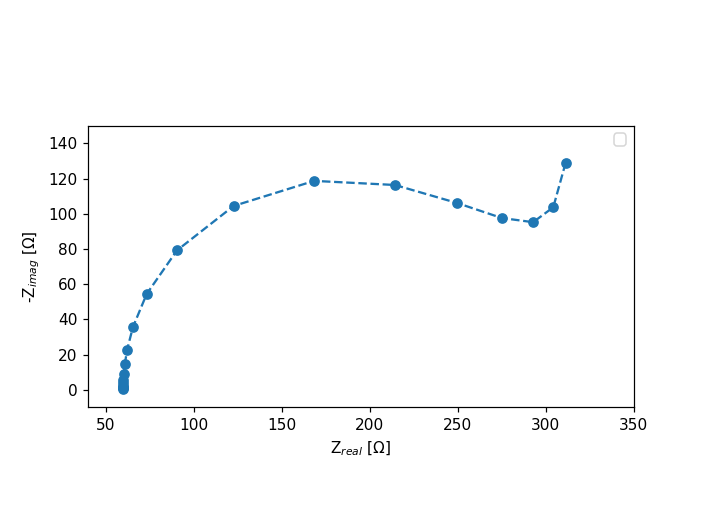

In [160]:
r_arr = vogit_add_C_arr - z_sim_addC_arr
r_arr

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00-1.11022302e-16j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00-4.44089210e-16j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, -7.10542736e-15+0.00000000e+00j,
        0.00000000e+00+3.55271368e-15j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+1.42108547e-14j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -5.68434189e-14+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+1.42108547e-14j,  0.00000000e+00+0.00000000e+00j])

## simulate_Z1_addC

In [112]:
def simulate_Z1_addC(w_list, Rs, Cs, R_list, tao_list):
    z_real_list = []
    z_imag_list = []
    z_list = []
    
    for w in w_list:
        z_real = Rs + sum([R/(1+(w*tao)**2) for R, tao in zip(R_list, tao_list)])
        z_imag = sum([w*R*tao/(1+(w*tao)**2) for R, tao in zip(R_list, tao_list)])
        z = z_real + (-1j)*z_imag + 1 / (1j * w * Cs)
        z_list.append(z)
    return np.array(z_list)

In [113]:
z1_sim_addC_arr = simulate_Z1_addC(w_list, Rs, Cs, R_list, tao_list)

%matplotlib widget
nyquist_plot_1(z_list=z1_sim_addC_arr, x_lim=[40, 350], y_lim=[-10, 150])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


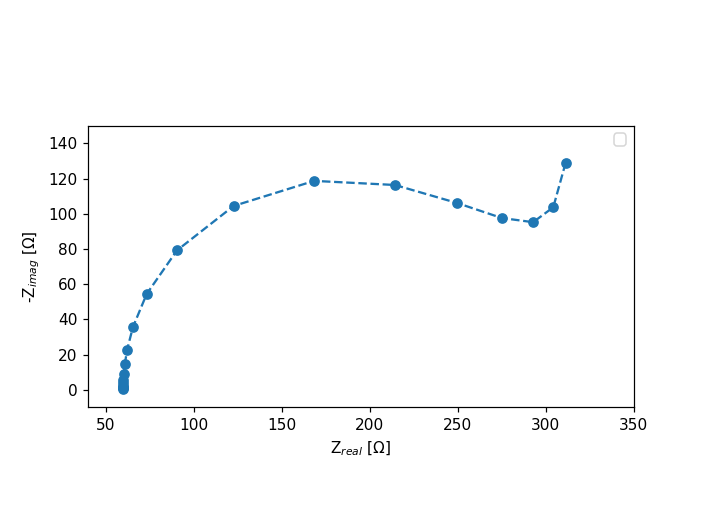

In [114]:
r1_arr = z1_sim_addC_arr - vogit_add_C_arr
r1_arr

array([ 0.00000000e+00+1.11022302e-16j,  0.00000000e+00+1.11022302e-16j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00-4.44089210e-16j,
        0.00000000e+00+4.44089210e-16j,  0.00000000e+00+8.88178420e-16j,
        0.00000000e+00+0.00000000e+00j,  7.10542736e-15+1.77635684e-15j,
        0.00000000e+00-3.55271368e-15j,  0.00000000e+00+7.10542736e-15j,
        0.00000000e+00+7.10542736e-15j, -1.42108547e-14+1.42108547e-14j,
       -1.42108547e-14+1.42108547e-14j,  0.00000000e+00-4.26325641e-14j,
       -2.84217094e-14-1.42108547e-14j, -5.68434189e-14+0.00000000e+00j,
        5.68434189e-14+0.00000000e+00j, -5.68434189e-14+0.00000000e+00j,
        5.68434189e-14-1.42108547e-14j,  0.00000000e+00+0.00000000e+00j])

In [115]:
def vogit0(w_arr, para_arr, tao_arr):
    # para_arr = [*Rs*, *Ls*, *Cs*, R0, R1, ..., R_M-1]
    Rs = para_arr[0]
    Ls = para_arr[1]
    Cs = para_arr[2]
    M_R_arr = para_arr[3:]

    # -------------- 计算M个RC各自产生的阻抗 --------------
    z_sim_arr = np.empty(shape=(M_R_arr.size, w_arr.shape[0]), dtype=complex)
    for i, R in enumerate(M_R_arr):
        tao = tao_arr[i]
        tmp_z_sim_list = [aRCb(w, R0=R, C0=tao/R) for w in w_arr]
        # IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed
        z_sim_arr[i, :] = tmp_z_sim_list
    # -------------- 计算M个RC各自产生的阻抗 --------------

    # 加上Ls产生的阻抗
    L_z_sim_arr = np.array([ele_L(w, Ls) for w in w_arr]).reshape((1, w_arr.size))
    # 加上Cs产生的阻抗
    C_z_sim_arr = np.array([ele_C(w, Cs) for w in w_arr]).reshape((1, w_arr.size))

    # 合并M个RC + Ls + Cs 各自产生的阻抗
    z_sim_arr = np.concatenate((z_sim_arr, L_z_sim_arr, C_z_sim_arr), axis=0)
    z_sim_arr = z_sim_arr.sum(axis=0)

    # 合并Rs + M个RC各自产生的阻抗
    z_sim_arr += Rs

    return z_sim_arr

In [15]:
a=np.array(([[1+2j]]))
b=np.array(([[3+5j]]))
a,b

(array([[1.+2.j]]), array([[3.+5.j]]))

In [16]:
a+b

array([[4.+7.j]])

In [20]:
c= np.array(([[1+2j],[3+5j]]))

In [21]:
c.sum(axis=0)

array([4.+7.j])

# 随意的测试

In [117]:
-186+120+78*4+30+78*2+78*3+60 +78*3+30+150+78*4+78*4+100+78*2+20 +180+78*2+78*2+100+150+78*3-3+90 +78*4 -3620

-205

In [118]:
-6245+120+100+60+200+100+150+100 +100+100+50+100+120+180+240+220 +100+100+100+100+100+150+90+110 +100-3620

-6975

In [119]:
56095+120+390+230+460+330+150+1700 +1700+390+390+100+1700+20+180+160+110 +100+150+260+90+1700+390-3620

63295

## Are' * Are + Aim' * Aim 是否等于 (Are + Aim)' * (Are + Aim)

In [121]:
Are = np.arange(100).reshape((5, 20))
Are

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [123]:
Aim = np.arange(7, 107).reshape((5, 20))
Aim

array([[  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26],
       [ 27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46],
       [ 47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86],
       [ 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106]])

In [124]:
a = Are.T.dot(Are) + Aim.T.dot(Aim)

In [125]:
b0 = Are + Aim
b = b0.T.dot(b0)

In [126]:
a-b

array([[-26800, -27235, -27670, -28105, -28540, -28975, -29410, -29845,
        -30280, -30715, -31150, -31585, -32020, -32455, -32890, -33325,
        -33760, -34195, -34630, -35065],
       [-27235, -27680, -28125, -28570, -29015, -29460, -29905, -30350,
        -30795, -31240, -31685, -32130, -32575, -33020, -33465, -33910,
        -34355, -34800, -35245, -35690],
       [-27670, -28125, -28580, -29035, -29490, -29945, -30400, -30855,
        -31310, -31765, -32220, -32675, -33130, -33585, -34040, -34495,
        -34950, -35405, -35860, -36315],
       [-28105, -28570, -29035, -29500, -29965, -30430, -30895, -31360,
        -31825, -32290, -32755, -33220, -33685, -34150, -34615, -35080,
        -35545, -36010, -36475, -36940],
       [-28540, -29015, -29490, -29965, -30440, -30915, -31390, -31865,
        -32340, -32815, -33290, -33765, -34240, -34715, -35190, -35665,
        -36140, -36615, -37090, -37565],
       [-28975, -29460, -29945, -30430, -30915, -31400, -31885, -32370,
   

结论：很明显，不相等

In [ ]:
np.abs(self.z_arr)

## numpy 使用delete根据index删除array里面的数据

In [6]:
import sys
import numpy as np
a=np.array([4,2,3,1])
remove_ixs=np.where(a>1)[0]
b=np.delete(a,remove_ixs)
print(b)

[1]


In [7]:
remove_ixs

array([0, 1, 2], dtype=int64)